## 01. Import Library

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import os

## 02. Import Path & Data Set 

### GeoSpatial Dataset (BBMP)

In [2]:
gdf = gpd.read_file(r"D:\Data Analysis\Data Immersion\6. Advanced Analytics and Dashboard Design\Project brief\BBMP.geojson")

In [3]:
gdf.shape

(243, 7)

In [4]:
gdf

,KGISWardID,KGISWardCode,LGD_WardCode,KGISWardNo,KGISWardName,KGISTownCode,geometry
0,4878,2003001,1303139.0,1,Kempegowda Ward,2003,"POLYGON ((77.61545 13.13028, 77.61549 13.13040..."
1,4879,2003002,1303140.0,2,Chowdeswari Ward,2003,"POLYGON ((77.57375 13.13736, 77.57370 13.13721..."
2,4882,2003003,1303141.0,3,Someshwara Ward,2003,"POLYGON ((77.56257 13.11640, 77.56252 13.11643..."
3,4883,2003004,1303142.0,4,Atturu Layout,2003,"POLYGON ((77.55155 13.10086, 77.55149 13.10086..."
4,4886,2003005,1303143.0,5,Yelahanka Satellite Town,2003,"POLYGON ((77.59084 13.07785, 77.59101 13.07826..."
...,...,...,...,...,...,...,...
238,4946,2003035,1302707.0,35,Hemmigepura,2003,"POLYGON ((77.46301 12.89810, 77.46289 12.89804..."
239,5239,2003182,1302854.0,182,Shanthi Nagar,2003,"POLYGON ((77.60179 12.95715, 77.60086 12.95745..."
240,5242,2003183,1302855.0,183,Neelasandra,2003,"POLYGON ((77.61210 12.95845, 77.61215 12.95890..."
241,5243,2003184,1302856.0,184,Vannarapete,2003,"POLYGON ((77.62580 12.95216, 77.62581 12.95224..."


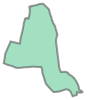

In [5]:
gdf.loc[1, "geometry"]

In [6]:
gdf["KGISWardName"].value_counts()

KGISWardName
Kempegowda Ward        1
Kamakya Nagar          1
Kogilu                 1
Azad Nagar             1
Chamrajapet            1
                      ..
Anjanapura             1
Shantala Nagar         1
Yediyur                1
Jagajivanaram Nagar    1
Vidyamanyanagar        1
Name: count, Length: 243, dtype: int64

In [7]:
gdf.columns

Index(['KGISWardID', 'KGISWardCode', 'LGD_WardCode', 'KGISWardNo',
       'KGISWardName', 'KGISTownCode', 'geometry'],
      dtype='object')

In [8]:
gdf["KGISWardID"].isna().sum()

0

In [9]:
gdf["KGISWardCode"].isna().sum()

0

In [10]:
gdf["LGD_WardCode"].isna().sum()

45

In [11]:
gdf["KGISWardNo"].isna().sum()

0

In [12]:
gdf["KGISWardName"].isna().sum()

0

In [13]:
gdf["KGISTownCode"].isna().sum()

0

In [14]:
gdf["geometry"].isna().sum()

0

In [15]:
gdf.drop(["LGD_WardCode"],axis=1,inplace=True)

In [16]:
gdf.head()

,KGISWardID,KGISWardCode,KGISWardNo,KGISWardName,KGISTownCode,geometry
0,4878,2003001,1,Kempegowda Ward,2003,"POLYGON ((77.61545 13.13028, 77.61549 13.13040..."
1,4879,2003002,2,Chowdeswari Ward,2003,"POLYGON ((77.57375 13.13736, 77.57370 13.13721..."
2,4882,2003003,3,Someshwara Ward,2003,"POLYGON ((77.56257 13.11640, 77.56252 13.11643..."
3,4883,2003004,4,Atturu Layout,2003,"POLYGON ((77.55155 13.10086, 77.55149 13.10086..."
4,4886,2003005,5,Yelahanka Satellite Town,2003,"POLYGON ((77.59084 13.07785, 77.59101 13.07826..."


### Zomato Dataset

#### Problem statement

A new restaurant will open shortly and want's to have high revenue with good rating and location.

In [17]:
df= pd.read_csv(r"D:\Data Analysis\Data Immersion\6. Advanced Analytics and Dashboard Design\Project brief\Zomato\zomato.csv")

In [18]:
df.head(20)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


## 03. Data Wrangling & Cleaning

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [20]:
df.shape

(51717, 17)

### Checking for missing data

In [21]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [22]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [23]:
#Drop missing data

df.dropna(inplace= True)

In [24]:
df.isna().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [25]:
# Drop column url
#Because it doesn't help in our analysis

df.drop(columns= "url", inplace=True)
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Phone Column

In the Phone column we saw that if the restaurant has multiple phone number they are separated by \r\n or \n. Lets replace all those phone number that contains letters other than space character\r, \n, by blank.


In [26]:
df["phone"]= df["phone"].str.replace(r'\r\n|\r|\n', '', regex=True)

In [27]:
df.head(10)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
10,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


### Checking unique values in df

In [28]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Tuk-Tuk',
       'Chime - Sheraton Grand Bengaluru Whitefield Hotel &...',
       'Fujian Express'], dtype=object)

In [29]:
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
## removing 'New' values
df["rate"]= df["rate"].replace("NEW", np.nan)

In [33]:
## function to remove '5'
def remove_5 (value: str):
    if type(value) == str:
        value_new=value.split('/')[0]
        return value_new
    return value

In [34]:
df["rate"]= df["rate"].apply(remove_5)

In [35]:
# Converting to float type data
df["rate"]= df["rate"].astype(float)

In [36]:
print(df["rate"].dtypes)

float64


In [37]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [38]:
df["votes"].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [39]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway, Delivery', 'Food Truck', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar', 'Bakery', 'Sweet Shop',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Microbrewery, Casual Dining', 'Sweet Shop, Quick Bites', 'Lounge',
       'Food Court', 'Cafe, Bakery', 'Microbrewery', 'Kiosk', 'Pub, Bar',
       'Casual Dining, Pub', 'Cafe, Quick Bites', 'Lounge, Bar',
       'Bakery, Quick Bites', 'Dessert Parlor, Quick Bites',
       'Bar, Casual Dining', 'Beverage Shop, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Mess', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Dessert Parlor, Cafe',
       'Bakery, Dessert Parlor', 'Quick Bites, Sweet Shop', 'Takeaway',
       'Microbrewery, Pub', 'Club', 'Fine Dining', 'Baker

In [40]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [41]:
df["dish_liked"].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [42]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

In [43]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [44]:
df["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [45]:
df["menu_item"].unique()

array(['[]',
       "['Chole Kulcha Meal', 'Upvas Aloo Paratha With Dahi', 'Singhada Aloo Paratha with Hare Tamatar Ki Sabji', 'Smoked Butter Chicken Combo', 'Paneer Methi Chaman Combo', 'Mutton Bhuna Combo', 'Rajma Masala Meal', 'Dal Makhani Veg Starter Combo', 'Dal Makhani Non-Veg Starter Combo', 'Malai Kofta Combo', 'Jumbo Chicken Wrap', 'Jumbo Veg Wrap', 'Jumbo Falafel Salsa Wrap', 'Chicken Overload Jumbo Wrap', 'Veg Pizza Wrap', 'Chicken Pizza Wrap', 'Mexican Potato Salsa Wrap', 'American Smokey Sausage Wrap', 'Makhani Falafel Wrap', 'Mutton Overload Wrap', 'Mac & Cheese Chicken Wrap', 'Mac & Cheese Veg Wrap', 'Barbeque Chicken Wrap', 'Mutton Boti Wrap', 'Masala Paneer Tikka Wrap', 'Fiery Paneer Tikka Wrap', 'Masala Chicken Tikka Wrap', 'Cheesy Corn Salsa Wrap', 'Chicken Mayo Wrap', 'Cheese Melt Chicken Wrap', 'Cheese Melt Paneer Wrap', 'Double Cheese Meatball Wrap', 'Reshmi Chicken Kebab Wrap', 'Egg Cheese Sausage Wrap', 'Double Egg Chatpata Wrap', 'Cheesy Potato Wrap', 'Veg Fala

In [46]:
df["approx_cost(for two people)"].unique

<bound method Series.unique of 0          800
1          800
2          800
3          300
4          600
         ...  
51705    1,200
51707    2,000
51708    1,200
51711      800
51715    2,500
Name: approx_cost(for two people), Length: 23193, dtype: object>

#### Noticing the ‘approx_cost’ attribute, we can observe that they are string values containing commas. Below is the code to convert them into numbers.

In [47]:
# Function to remove commas and convert the values into numbers

def approx_cost(value):
    value= str(value)
    if "," in value:
        value= float (value.replace(",", ""))
        return value
    else:
        return float(value)

In [48]:
df["approx_cost(for two people)"]= df["approx_cost(for two people)"].apply(approx_cost)

In [49]:
print(df["approx_cost(for two people)"].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64


In [50]:
df["menu_item"]

0        []
1        []
2        []
3        []
4        []
         ..
51705    []
51707    []
51708    []
51711    []
51715    []
Name: menu_item, Length: 23193, dtype: object

### Check for duplicate

In [51]:
df_dups= df[df.duplicated()]

In [52]:
df_dups.shape

(11, 16)

In [53]:
df_dups

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
9464,"744, 13th Main, 7th Cross, BTM 2nd Stage, BTM,...",Vyanjan,Yes,No,3.9,201,+91 9916937446,BTM,Quick Bites,"Poha, Jalebi, Paratha, Bhindi Masala, Kachori,...","North Indian, Street Food",300.0,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM
9466,"607, First Floor, 80 Feet Road, 6th Block, Kor...",Carrots,Yes,Yes,4.1,600,080 41172812,Koramangala 6th Block,Casual Dining,"Pizza, Pasta, Salads, Masala Chai, Soya Butter...","Italian, North Indian, Healthy Food, Desserts",1100.0,"[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM
9468,"6th Cross Road, Koramangala 6th Block, Bangalore",Rolls & Co,Yes,No,3.9,213,+91 7353848635,Koramangala 6th Block,Quick Bites,"Rolls, Chicken Wings, Shawarma, Chicken Tikka ...","Burger, Beverages, Rolls",400.0,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM
12314,"19/1, Queen's Road Cross, Munniswamy Road, Nea...",Ta'aam,Yes,No,4.1,402,+91 9845538234+91 9845538446,Cunningham Road,Casual Dining,"Laham Mandi, Mutton Chops, Biryani, Mutton Sou...","North Indian, Mughlai, Arabian, Chinese",750.0,"[('Rated 4.0', ""RATED\n For all gluttons out ...",[],Delivery,Church Street
13442,"Opposite Velankani Gate number 2, Doddathoguru...",Lassi Adda,Yes,No,4.0,65,+91 9164247999+91 9986382545,Electronic City,Beverage Shop,"Sweet Lassi, Corn Sandwich","Beverages, Sandwich, Fast Food",200.0,"[('Rated 4.0', 'RATED\n My favourite go to pl...",[],Delivery,Electronic City
20236,"746, 7th cross, 13th Main, BTM, Bangalore",Funky Punjab,Yes,No,3.8,125,+91 8884449474,BTM,Quick Bites,"Roti, Dal Makhani, Lassi, Panneer Butter Masal...","North Indian, Chinese",400.0,"[('Rated 3.0', ""RATED\n Wasn't as great as we...",[],Delivery,Jayanagar
37692,"Ashraya Hotel, 149, Infantry Road, Bangalore",The Oriental Spice - Ashraya Hotel,Yes,No,3.9,158,080 41148989+91 7795612130,Infantry Road,Casual Dining,"Noodles, Lunch Buffet, Fish, Manchurian, Salad...","Chinese, Thai, Indonesian",1300.0,"[('Rated 4.0', 'RATED\n Had been there for a ...","['Sour Pepper Soup', 'Chicken Cantonese Style'...",Buffet,Lavelle Road
38585,"Level 2, The Collection, UB City, Vithal Mally...",Rasovara,Yes,Yes,4.3,772,080 41738968+91 9886060965,Lavelle Road,Casual Dining,"Thali, Aamras, Malpua, Dal Bati, Lassi, Plain ...","Rajasthani, North Indian",1400.0,"[('Rated 4.0', 'RATED\n The problem here is a...",[],Dine-out,Lavelle Road
42343,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,Yes,Yes,4.2,570,080 40918141+91 8867785004,Shanti Nagar,Casual Dining,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...","Chinese, North Indian, Biryani, Kebab",1200.0,"[('Rated 5.0', 'RATED\n Was wandering around ...","['Paneer Makhani', 'Hyderabadi Biryani', 'Spec...",Delivery,MG Road
43354,"36, Vittal Mallya Road, Lavelle Road, Bangalore",Bootlegger,No,No,4.1,1545,+91 8022290099+91 8041462747,Lavelle Road,Pub,"Beer, Cocktails, Beef Steak, Beef Chilli, Nach...","Continental, Steak",1200.0,"[('Rated 2.0', 'RATED\n Bootlegger is undoubt...",[],Dine-out,MG Road


In [54]:
df.shape

(23193, 16)

In [55]:
df=df.drop_duplicates()

In [56]:
df.shape

(23182, 16)

### Check if there is mixed data types 

In [57]:
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type)!= df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[weird])>0:
        print(col)

In [58]:
df.shape

(23182, 16)

#### Again rechecking for missing values

In [59]:
print(df.isnull().sum())

address                          0
name                             0
online_order                     0
book_table                       0
rate                           147
votes                            0
phone                            0
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64


In [60]:
df=df.dropna()

In [61]:
print(df.isnull().sum())

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [62]:
df.shape

(23035, 16)

### Export "restaurant type" column to see how many categories are there and found 73 category

In [63]:
df['rest_type'].to_csv('column_data.csv', index=False)

#### Replaced 73 category to 16 category with simplier restaurant type

In [64]:
df["rest_type"]=df["rest_type"].replace({"Casual Dining, Cafe": "Casual Dining", "Cafe, Casual Dining": "Casual Dining","Quick Bites, Cafe": "Cafe",
                                         "Delivery": "Takeaway, Delivery", "Quick Bites, Dessert Parlor": "Quick Bites", "Pub, Casual Dining": "Pub",
                                         "Bakery": "Quick Bites", "Sweet Shop": "Quick Bites", "Dessert Parlor, Beverage Shop": "Dessert Parlor",
                                         "Beverage Shop, Quick Bites": "Quick Bites", "Microbrewery, Casual Dining": "Microbrewery", "Sweet Shop, Quick Bites": "Quick Bites",
                                         "Lounge": "Pub", "Cafe, Bakery": "Cafe", "Kiosk": "Quick Bites", "Pub, Bar": "Pub", "Casual Dining, Pub": "Pub",
                                         "Cafe, Quick Bites": "Cafe", "Lounge, Bar": "Bar", "Bakery, Quick Bites": "Quick Bites", "Dessert Parlor, Quick Bites": "Quick Bites",
                                         "Bar, Casual Dining": "Bar", "Beverage Shop, Dessert Parlor": "Dessert Parlor", "Casual Dining, Microbrewery": "Microbrewery",
                                         "Lounge, Casual Dining": "Casual Dining", "Cafe, Dessert Parlor": "Cafe", "Dessert Parlor, Cafe": "Cafe",
                                         "Bakery, Dessert Parlor": "Dessert Parlor", "Quick Bites, Sweet Shop": "Quick Bites","Takeaway": "Takeaway, Delivery",
                                         "Microbrewery, Pub": "Microbrewery", "Bakery, Cafe": "Cafe", "Beverage Shop, Cafe": "Cafe",
                                         "Pub, Cafe": "Pub", "Casual Dining, Irani Cafee": "Casual Dining", "Food Court, Quick Bites": "Food Court",
                                         "Quick Bites, Beverage Shop": "Quick Bites", "Fine Dining, Lounge": "Fine Dining", "Quick Bites, Bakery": "Quick Bites",
                                         "Bar, Quick Bites": "Bar","Pub, Microbrewery": "Microbrewery", "Microbrewery, Lounge": "Microbrewery",
                                         "Fine Dining, Microbrewery": "Microbrewery", "Fine Dining, Bar": "Bar", "Dessert Parlor, Kiosk": "Dessert Parlor",
                                         "Cafe, Bar": "Bar", "Quick Bites, Food Court": "Quick Bites", "Casual Dining, Lounge": "Casual Dining",
                                         "Microbrewery, Bar": "Microbrewery", "Cafe, Lounge": "Cafe", "Bar, Pub": "Pub", "Lounge, Cafe": "Cafe",
                                         "Dessert Parlor, Bakery": "Dessert Parlor", "Club, Casual Dining": "Club", "Lounge, Microbrewery": "Microbrewery",
                                         "Bar, Lounge": "Bar", "Food Court, Casual Dining": "Casual Dining", "Casual Dining, Bar": "Bar"})

In [65]:
df["rest_type"].value_counts()

rest_type
Casual Dining         7817
Quick Bites           6088
Cafe                  2878
Bar                   1775
Dessert Parlor        1253
Pub                   1036
Takeaway, Delivery    1021
Microbrewery           352
Fine Dining            325
Food Court             251
Beverage Shop          137
Mess                    49
Club                    41
Food Truck              11
Dhaba                    1
Name: count, dtype: int64

In [66]:
## For df checking unique values of categorical variables

for column in df.columns:
    if df[column].dtypes == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts().sort_values())
        print("\n")

ADDRESS :  4349
address
30/1, Near Indian Express, Cunningham Road, Bangalore                                     1
Whitefield Last Bus Stop, Whitefield, Bangalore                                           1
12th Floor, Gamma Building, Sigma Soft Tech Park, Varthur Kodi, Whitefield, Bangalore     1
Food Court, Phoenix Market City Mall, Whitefield, Bangalore                               1
Hoodi Circle, ITPL Main Road, Whitefield, Bangalore                                       1
                                                                                         ..
Citrus Hotels, 34, Cunningham Road, Bangalore                                            35
Vivanta By Taj, 41/3, MG Road, Bangalore                                                 35
The Oberoi, 37-39, MG Road, Bangalore                                                    36
The Park Bangalore, 14/7, MG Road, Bangalore                                             38
The Ritz-Carlton, 99, Residency Road, Bangalore         

In [67]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [68]:
df["cuisines"]=df["cuisines"].replace({"African, Burger": "World Cuisine","American": "World Cuisine","American, Asian, European, North Indian": "World Cuisine","American, BBQ": "World Cuisine","American, Burger, Italian, Steak": "World Cuisine","American, Cafe, Continental, French, Burger, Mexican, Desserts, Pizza": "World Cuisine","American, Chinese, Continental, North Indian": "World Cuisine","American, Continental": "World Cuisine","American, Continental, BBQ, Steak": "World Cuisine","American, Continental, Chinese": "World Cuisine","American, Continental, North Indian, Mediterranean": "World Cuisine","American, Continental, North Indian, Salad": "World Cuisine","American, Continental, Pizza": "World Cuisine","American, Continental, Salad": "World Cuisine","American, Continental, Steak": "World Cuisine","American, Continental, Steak, Salad": "World Cuisine","American, European": "World Cuisine","American, Fast Food": "World Cuisine","American, Finger Food": "World Cuisine","American, Finger Food, BBQ, Steak": "World Cuisine","American, Italian": "World Cuisine","American, Italian, Bakery, Desserts, Sandwich, Beverages, Salad, Rolls": "World Cuisine","American, Mexican, Italian, Steak": "World Cuisine","American, Modern Indian, Italian, South Indian": "World Cuisine","American, North Indian, Chinese": "World Cuisine","American, North Indian, European, Tex-Mex": "World Cuisine","American, North Indian, Pizza, Finger Food, Continental, Italian": "World Cuisine","American, North Indian, Salad": "World Cuisine","American, Pizza, Burger": "World Cuisine","American, Sandwich": "World Cuisine","American, South Indian, Thai, Pizza, Italian": "World Cuisine","American, Tex-Mex, Burger, BBQ": "World Cuisine","American, Tex-Mex, Burger, BBQ, Mexican": "World Cuisine","Arabian": "World Cuisine","Arabian, BBQ, Rolls, Chinese": "World Cuisine","Arabian, BBQ, Rolls, Lebanese": "World Cuisine","Arabian, Biryani, Chinese, Middle Eastern, Fast Food, North Indian, Mughlai, Seafood": "World Cuisine","Arabian, Biryani, Desserts, Beverages, Salad": "World Cuisine","Arabian, Chinese, Continental, North Indian, Finger Food": "World Cuisine","Arabian, Lebanese, Chinese, Rolls": "World Cuisine","Arabian, Lebanese, Chinese, Rolls, North Indian": "World Cuisine","Arabian, Lebanese, Mughlai, North Indian, BBQ": "World Cuisine","Arabian, Lebanese, Mughlai, North Indian, BBQ, Chinese": "World Cuisine","Arabian, Mediterranean, North Indian": "World Cuisine","Arabian, Middle Eastern": "World Cuisine","Arabian, Mughlai, Chinese, Kebab, Fast Food": "World Cuisine","Arabian, Pizza, Greek, Lebanese, Mediterranean": "World Cuisine","Asian, American, Mexican": "World Cuisine","Asian, Beverages": "World Cuisine","Asian, Burger, Chinese, Finger Food": "World Cuisine","Asian, Burger, Pizza, Chinese, Finger Food": "World Cuisine","Asian, Chinese, Continental, Italian": "World Cuisine","Asian, Continental, European, Fast Food, North Indian, Mughlai, South Indian": "World Cuisine","Asian, Continental, European, Mediterranean": "World Cuisine","Asian, Continental, European, North Indian": "World Cuisine","Asian, Continental, European, North Indian, Mediterranean": "World Cuisine","Asian, Continental, Finger Food": "World Cuisine","Asian, Continental, Mediterranean, Salad, American, Biryani": "World Cuisine","Asian, Continental, North Indian": "World Cuisine","Asian, Continental, North Indian, Italian": "World Cuisine","Asian, European, Italian, Korean, Malaysian, Thai, Vietnamese, Chinese": "World Cuisine","Asian, Mediterranean, North Indian, BBQ": "World Cuisine","Bakery, Continental, Sandwich, Beverages, Desserts": "World Cuisine","Bakery, Desserts, Italian": "World Cuisine","Bakery, French, Desserts": "World Cuisine","Bar Food, Asian, European, Mediterranean": "World Cuisine","BBQ": "World Cuisine","BBQ, Arabian, Chinese, Kebab, Beverages": "World Cuisine","BBQ, Continental, North Indian, Pizza, European": "World Cuisine","Beverages, Italian, Pizza, Burger": "World Cuisine","Biryani, Chinese, Continental, North Indian, Pizza": "World Cuisine","Biryani, Kebab, Continental": "World Cuisine","Biryani, Mughlai, Chinese, Arabian": "World Cuisine","British, Continental, BBQ": "World Cuisine","Burger, American, Italian": "World Cuisine","Burger, BBQ": "World Cuisine","Burger, Continental, Italian, Beverages": "World Cuisine","Burger, Desserts, Italian, Pizza, Salad": "World Cuisine","Burger, Fast Food, Roast Chicken, Finger Food": "World Cuisine","Burger, Pizza, Continental": "World Cuisine","Burger, Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts": "World Cuisine","Cafe, Italian, Burger, American, Steak": "World Cuisine","Chinese, American, Continental, Italian, North Indian": "World Cuisine","Chinese, Asian, American, Seafood": "World Cuisine","Chinese, Biryani, Pizza, Italian, North Indian": "World Cuisine","Chinese, Continental": "World Cuisine","Chinese, Continental, American, Steak": "World Cuisine","Chinese, Continental, Burger, Pizza": "World Cuisine","Chinese, Continental, Finger Food, Italian": "World Cuisine","Chinese, Continental, North Indian, Burger, Pizza, Seafood": "World Cuisine","Chinese, Continental, North Indian, Finger Food": "World Cuisine","Chinese, Continental, North Indian, Mexican": "World Cuisine","Chinese, Continental, North Indian, Mughlai, Steak": "World Cuisine","Chinese, Continental, North Indian, Pizza, South Indian": "World Cuisine","Chinese, Fast Food, Italian": "World Cuisine","Chinese, Italian, North Indian": "World Cuisine","Chinese, North Indian, Continental": "World Cuisine","Chinese, North Indian, Pizza, Italian": "World Cuisine","Chinese, Thai, Asian, Malaysian, Vietnamese, Sri Lankan, Burmese": "World Cuisine","Continental": "World Cuisine", "Continental, American": "World Cuisine","Continental, American, Asian, North Indian, Burger": "World Cuisine","Continental, American, Chinese, BBQ, Salad": "World Cuisine","Continental, American, Chinese, BBQ, Salad, Italian": "World Cuisine","Continental, American, Indonesian, Asian, Thai": "World Cuisine","Continental, American, Italian, Modern Indian, Pizza, Burger": "World Cuisine","Continental, American, Mediterranean, Healthy Food": "World Cuisine", "Continental, American, North Indian, Chinese": "World Cuisine","Continental, American, Pizza, BBQ": "World Cuisine","Continental, American, Pizza, North Indian, Chinese, Finger Food, Asian, Thai": "World Cuisine","Continental, American, South Indian, Italian, North Indian, Chinese": "World Cuisine","Continental, Asian": "World Cuisine","Continental, Asian, American, North Indian, Desserts": "World Cuisine","Continental, Asian, Chinese, Italian, North Indian": "World Cuisine","Continental, Asian, Healthy Food, Burger, Biryani, Pizza, Italian, Fast Food": "World Cuisine","Continental, Asian, Italian": "World Cuisine","Continental, Asian, Italian, North Indian": "World Cuisine","Continental, Asian, Modern Indian": "World Cuisine","Continental, BBQ, Finger Food": "World Cuisine","Continental, BBQ, Salad": "World Cuisine","Continental, BBQ, Steak": "World Cuisine","Continental, Beverages": "World Cuisine","Continental, Beverages, Burger, Coffee, Desserts": "World Cuisine","Continental, Biryani, Desserts, Italian, North Indian, Chinese, Modern Indian, Asian": "World Cuisine","Continental, Biryani, Pizza, North Indian, Chinese, Momos, Andhra, Kebab": "World Cuisine","Continental, Burger, BBQ": "World Cuisine","Continental, Burger, Italian, Pizza, North Indian, Salad": "World Cuisine","Continental, Burger, Salad, Pizza, Beverages": "World Cuisine","Continental, Cafe, Desserts, Pizza, North Indian, Chinese, Ice Cream": "World Cuisine","Continental, Chinese": "World Cuisine","Continental, Chinese, Finger Food, North Indian": "World Cuisine","Continental, Chinese, Italian": "World Cuisine","Continental, Chinese, North Indian, Asian, Healthy Food, Fast Food": "World Cuisine","Continental, Chinese, North Indian, Finger Food": "World Cuisine","Continental, Chinese, Steak": "World Cuisine","Continental, Chinese, Thai, Italian, BBQ, Steak": "World Cuisine","Continental, Desserts, Beverages": "World Cuisine","Continental, European, Asian, Seafood, Spanish": "World Cuisine","Continental, European, BBQ, Chinese, Asian": "World Cuisine","Continental, European, Salad, Beverages, Italian, Burger": "World Cuisine","Continental, Fast Food": "World Cuisine","Continental, Fast Food, Beverages, Desserts": "World Cuisine","Continental, Fast Food, European": "World Cuisine","Continental, Fast Food, Street Food, Momos": "World Cuisine","Continental, Finger Food": "World Cuisine","Continental, Finger Food, Asian, Chinese": "World Cuisine","Continental, Finger Food, Asian, North Indian": "World Cuisine","Continental, Finger Food, North Indian, Chinese": "World Cuisine","Continental, Finger Food, Pizza": "World Cuisine","Continental, Finger Food, Pizza, North Indian": "World Cuisine","Continental, Finger Food, Pizza, North Indian, Bar Food": "World Cuisine","Continental, Finger Food, Seafood, Pizza": "World Cuisine","Continental, Healthy Food": "World Cuisine","Continental, Italian": "World Cuisine","Continental, Italian, American": "World Cuisine","Continental, Italian, Beverages": "World Cuisine","Continental, Italian, Burger": "World Cuisine","Continental, Italian, Burger, American": "World Cuisine","Continental, Italian, Chinese": "World Cuisine","Continental, Italian, Chinese, North Indian": "World Cuisine","Continental, Italian, Mediterranean, Salad": "World Cuisine","Continental, Italian, Mexican, Asian": "World Cuisine","Continental, Italian, Mexican, North Indian, Chinese, Steak": "World Cuisine","Continental, Italian, North Indian": "World Cuisine", "Continental, Italian, North Indian, Asian, Bakery, Chinese, European, Japanese": "World Cuisine","Continental, Italian, North Indian, Mexican": "World Cuisine","Continental, Italian, Pizza": "World Cuisine","Continental, Italian, Steak, American": "World Cuisine","Continental, Lebanese, Middle Eastern, North Indian, Chinese, BBQ, Cafe": "World Cuisine","Continental, Mediterranean, European": "World Cuisine","Continental, Mediterranean, Italian, North Indian, Finger Food, Asian, Momos": "World Cuisine","Continental, Mediterranean, North Indian, Chinese, Finger Food": "World Cuisine","Continental, Mediterranean, South Indian, North Indian, Asian": "World Cuisine","Continental, Mexican, Burger, Desserts, Italian, Pizza, North Indian, Chinese": "World Cuisine","Continental, Mexican, Chinese, North Indian": "World Cuisine","Continental, Modern Indian": "World Cuisine","Continental, North Indian": "World Cuisine","Continental, North Indian, Asian": "World Cuisine","Continental, North Indian, Asian, Italian": "World Cuisine","Continental, North Indian, Beverages": "World Cuisine","Continental, North Indian, Chinese, American": "World Cuisine","Continental, North Indian, Chinese, American, Pizza, Finger Food": "World Cuisine","Continental, North Indian, Chinese, BBQ": "World Cuisine","Continental, North Indian, Chinese, Bengali": "World Cuisine","Continental, North Indian, Chinese, European, BBQ, Finger Food, Asian": "World Cuisine","Continental, North Indian, Chinese, Finger Food": "World Cuisine","Continental, North Indian, Chinese, Italian": "World Cuisine","Continental, North Indian, Chinese, Lebanese": "World Cuisine","Continental, North Indian, Chinese, Pizza": "World Cuisine","Continental, North Indian, Chinese, Pizza, Thai": "World Cuisine","Continental, North Indian, Chinese, Salad": "World Cuisine","Continental, North Indian, Chinese, Steak": "World Cuisine","Continental, North Indian, Desserts, Beverages": "World Cuisine","Continental, North Indian, Finger Food": "World Cuisine","Continental, North Indian, Italian": "World Cuisine","Continental, North Indian, Italian, Chinese": "World Cuisine","Continental, North Indian, Italian, South Indian, Finger Food": "World Cuisine","Continental, North Indian, Japanese, Italian": "World Cuisine","Continental, North Indian, Mughlai": "World Cuisine","Continental, North Indian, Pizza, BBQ": "World Cuisine","Continental, North Indian, Pizza, Italian": "World Cuisine","Continental, North Indian, South Indian, Chinese": "World Cuisine","Continental, North Indian, South Indian, Italian": "World Cuisine","Continental, Parsi, Chinese, North Indian, Italian, Steak": "World Cuisine","Continental, Pizza, Burger": "World Cuisine","Continental, Pizza, Chinese": "World Cuisine","Continental, Salad, Burger, Finger Food, Pizza": "World Cuisine","Continental, Sandwich, Burger, Italian, Salad, Pizza": "World Cuisine","Continental, Seafood, Bengali, Fast Food": "World Cuisine","Continental, Steak": "World Cuisine","Continental, Steak, Chinese, Salad, Desserts, Seafood, Italian": "World Cuisine","Continental, Steak, Fast Food": "World Cuisine","Continental, Thai, Arabian, Mexican": "World Cuisine","Continental, Thai, Malaysian, Burmese, Korean, Vietnamese, Chinese, North Indian": "World Cuisine","Continental, Thai, North Indian, Chinese": "World Cuisine","Continental, Thai, Vietnamese, American, Chinese, North Indian, Finger Food": "World Cuisine","Desserts, Beverages, American": "World Cuisine","Desserts, Continental": "World Cuisine","Desserts, Italian, Pizza": "World Cuisine","European": "World Cuisine","European, American": "World Cuisine","European, American, Continental, North Indian, Steak": "World Cuisine","European, Asian": "World Cuisine","European, Continental": "World Cuisine","European, Continental, Asian, Finger Food": "World Cuisine","European, Continental, Chinese, Thai": "World Cuisine","European, French, North Indian": "World Cuisine","European, French, Salad": "World Cuisine","European, Italian, Asian": "World Cuisine","European, Italian, Desserts, Salad, Juices, Steak": "World Cuisine","European, Italian, Seafood, Continental": "World Cuisine","European, Mediterranean, Asian, North Indian, South Indian, Momos": "World Cuisine","European, Mediterranean, North Indian": "World Cuisine","European, Mediterranean, North Indian, BBQ": "World Cuisine","European, Mediterranean, Salad": "World Cuisine","European, North Indian, Mediterranean, Asian, Salad": "World Cuisine","European, Spanish, Continental, Italian": "World Cuisine","Fast Food, Burger, Sandwich, Pizza": "World Cuisine","Fast Food, Continental, Desserts": "World Cuisine","Fast Food, European": "World Cuisine","Fast Food, Italian": "World Cuisine","Finger Food, American, Asian, Italian": "World Cuisine","Finger Food, American, Continental, Burger, Pizza": "World Cuisine","Finger Food, Asian, European, Italian": "World Cuisine","Finger Food, Chinese, Continental": "World Cuisine","Finger Food, Chinese, Italian, Burger": "World Cuisine","Finger Food, Continental": "World Cuisine","Finger Food, Continental, Asian, North Indian": "World Cuisine","Finger Food, Continental, Chinese": "World Cuisine","Finger Food, Continental, Italian, Salad": "World Cuisine","Finger Food, Continental, North Indian": "World Cuisine","Finger Food, Continental, North Indian, Chinese": "World Cuisine","Finger Food, Continental, North Indian, Italian, Japanese": "World Cuisine","Finger Food, Continental, Pizza": "World Cuisine","Finger Food, Continental, Pizza, Asian, North Indian": "World Cuisine","Finger Food, Continental, Seafood": "World Cuisine","Finger Food, Italian, Continental": "World Cuisine","Finger Food, Mediterranean, North Indian": "World Cuisine","Finger Food, North Indian, Chinese, Italian": "World Cuisine","Finger Food, Salad, Chinese, Continental": "World Cuisine","Finger Food, South Indian, Continental": "World Cuisine","French, Italian": "World Cuisine","French, Pizza, Bakery": "World Cuisine","French, Sandwich, Salad": "World Cuisine","Goan, Asian, North Indian, European, Continental": "World Cuisine","Healthy Food, Beverages, European, Salad": "World Cuisine","Healthy Food, Continental, Juices, Salad, Burger, Beverages, Desserts": "World Cuisine","Healthy Food, Continental, North Indian": "World Cuisine","Healthy Food, Mediterranean, Desserts, Italian, Pizza, Salad, Kebab": "World Cuisine","Healthy Food, North Indian, Biryani, Continental, Desserts": "World Cuisine","Healthy Food, Salad": "World Cuisine","Healthy Food, Salad, Mediterranean": "World Cuisine","Healthy Food, Sandwich, Salad": "World Cuisine","Italian": "World Cuisine","Italian, American, Asian, Continental, Mexican, Momos": "World Cuisine","Italian, American, Fast Food, Wraps, Rolls, Salad": "World Cuisine","Italian, American, North Indian": "World Cuisine","Italian, American, Pizza": "World Cuisine","Italian, American, Steak, Continental, BBQ, Salad": "World Cuisine","Italian, BBQ, Asian, Fast Food": "World Cuisine","Italian, Beverages": "World Cuisine","Italian, Biryani, Fast Food, North Indian, Rolls": "World Cuisine","Italian, Chinese, Continental": "World Cuisine","Italian, Chinese, Continental, North Indian, Seafood, Thai": "World Cuisine","Italian, Chinese, Continental, Steak": "World Cuisine","Italian, Chinese, Japanese": "World Cuisine","Italian, Continental": "World Cuisine","Italian, Continental, Fast Food, Chinese, Momos": "World Cuisine","Italian, Continental, Pizza": "World Cuisine","Italian, European": "World Cuisine","Italian, European, Mediterranean": "World Cuisine","Italian, Fast Food, Cafe, European": "World Cuisine","Italian, Fast Food, Pizza": "World Cuisine","Italian, Fast Food, Salad, BBQ": "World Cuisine","Italian, Mediterranean": "World Cuisine","Italian, Mediterranean, European, Sandwich": "World Cuisine","Italian, Mediterranean, Pizza": "World Cuisine","Italian, Mexican": "World Cuisine","Italian, Mexican, Continental, Pizza": "World Cuisine","Italian, Mexican, Mediterranean, North Indian, Continental": "World Cuisine","Italian, North Indian, Biryani": "World Cuisine","Italian, North Indian, Continental": "World Cuisine","Italian, North Indian, Continental, BBQ": "World Cuisine","Italian, North Indian, Healthy Food, Desserts": "World Cuisine","Italian, North Indian, Lebanese": "World Cuisine","Italian, North Indian, Mexican": "World Cuisine","Italian, North Indian, South Indian, Chinese": "World Cuisine","Italian, Pizza": "World Cuisine","Italian, Pizza, Beverages": "World Cuisine","Italian, Pizza, Burger": "World Cuisine","Italian, Pizza, Fast Food, Salad": "World Cuisine","Italian, Pizza, Mexican": "World Cuisine","Italian, Pizza, North Indian, Salad": "World Cuisine","Italian, Pizza, Salad": "World Cuisine","Italian, Salad": "World Cuisine","Italian, Salad, Healthy Food, Cafe, Asian, Desserts, Pizza": "World Cuisine","Italian, Salad, Mediterranean": "World Cuisine","Italian, Seafood, American, Continental": "World Cuisine","Japanese, Italian, American, Asian, North Indian, Steak": "World Cuisine","Kerala, North Indian, Italian, Thai": "World Cuisine","Lebanese": "World Cuisine","Lebanese, Arabian, Middle Eastern, Salad, Beverages": "World Cuisine","Lebanese, Greek": "World Cuisine","Lebanese, Mediterranean, Afghan": "World Cuisine","Lebanese, Middle Eastern": "World Cuisine","Lebanese, Turkish": "World Cuisine","Mediterranean": "World Cuisine","Mediterranean, Arabian, Lebanese": "World Cuisine","Mediterranean, Arabian, Lebanese, Rolls": "World Cuisine","Mediterranean, BBQ": "World Cuisine","Mediterranean, Continental, French, Italian": "World Cuisine","Mediterranean, Continental, Italian, Salad": "World Cuisine","Mediterranean, Continental, North Indian, Mughlai, Salad": "World Cuisine","Mediterranean, European, Salad": "World Cuisine","Mediterranean, Italian, Asian": "World Cuisine","Mediterranean, Italian, Mexican": "World Cuisine","Mediterranean, Middle Eastern, Wraps, Rolls": "World Cuisine","Mediterranean, Pizza, Continental, Seafood, Salad": "World Cuisine","Mediterranean, Pizza, Italian, Beverages": "World Cuisine","Mexican": "World Cuisine","Mexican, Continental, Italian, Chinese": "World Cuisine","Mexican, Fast Food": "World Cuisine","Mexican, Italian": "World Cuisine","Mexican, Tex-Mex": "World Cuisine","Middle Eastern, Fast Food, Rolls": "World Cuisine","Modern Indian": "World Cuisine","Modern Indian, Continental": "World Cuisine","Modern Indian, Continental, North Indian": "World Cuisine","Modern Indian, European, American": "World Cuisine","Modern Indian, European, Asian": "World Cuisine","Modern Indian, North Indian": "World Cuisine","Modern Indian, North Indian, Pizza, Continental, Beverages": "World Cuisine","Mughlai, North Indian, Continental": "World Cuisine","Mughlai, North Indian, Turkish, Afghan": "World Cuisine","North Indian, Afghan": "World Cuisine","North Indian, Afghani": "World Cuisine","North Indian, American, Italian": "World Cuisine","North Indian, Arabian, Mughlai, Middle Eastern, Grill": "World Cuisine","North Indian, Asian, Continental": "World Cuisine","North Indian, Asian, Continental, Bengali, Momos": "World Cuisine","North Indian, Asian, South Indian, Italian, European": "World Cuisine","North Indian, Chinese, Arabian, BBQ, Middle Eastern": "World Cuisine","North Indian, Chinese, Continental, Biryani": "World Cuisine","North Indian, Chinese, Continental, Italian": "World Cuisine","North Indian, Chinese, Continental, Mexican": "World Cuisine","North Indian, Chinese, Continental, Momos": "World Cuisine","North Indian, Chinese, Continental, Pizza": "World Cuisine","North Indian, Chinese, Continental, Street Food": "World Cuisine","North Indian, Chinese, Continental, Thai, Salad": "World Cuisine","North Indian, Chinese, European": "World Cuisine","North Indian, Chinese, Italian": "World Cuisine","North Indian, Chinese, Japanese, European, Seafood": "World Cuisine","North Indian, Chinese, Mediterranean": "World Cuisine","North Indian, Chinese, Middle Eastern": "World Cuisine","North Indian, Chinese, Mughlai, Mexican, BBQ": "World Cuisine","North Indian, Chinese, Thai, Continental": "World Cuisine","North Indian, Continental, Asian": "World Cuisine","North Indian, Continental, Asian, Italian": "World Cuisine","North Indian, Continental, Asian, Pizza": "World Cuisine","North Indian, Continental, BBQ": "World Cuisine","North Indian, Continental, British": "World Cuisine","North Indian, Continental, Chettinad, Andhra, Bengali": "World Cuisine","North Indian, Continental, Chinese, European": "World Cuisine","North Indian, Continental, Chinese, Italian": "World Cuisine","North Indian, Continental, Chinese, Mexican, Italian": "World Cuisine","North Indian, Continental, Chinese, Seafood": "World Cuisine","North Indian, Continental, Chinese, Steak": "World Cuisine","North Indian, Continental, Chinese, Thai": "World Cuisine","North Indian, Continental, Fast Food, Beverages, Pizza": "World Cuisine","North Indian, Continental, Finger Food, American, Asian": "World Cuisine","North Indian, Continental, Italian": "World Cuisine","North Indian, Continental, Mediterranean": "World Cuisine","North Indian, Continental, Mediterranean, Chinese": "World Cuisine","North Indian, Continental, South Indian, Asian": "World Cuisine","North Indian, Continental, Street Food": "World Cuisine","North Indian, European, Mediterranean": "World Cuisine","North Indian, European, Mediterranean, BBQ": "World Cuisine","North Indian, European, Mediterranean, BBQ, Kebab": "World Cuisine","North Indian, European, Thai": "World Cuisine","North Indian, Iranian": "World Cuisine","North Indian, Italian, Asian, Continental, Mediterranean": "World Cuisine","North Indian, Italian, Chinese, Asian": "World Cuisine","North Indian, Italian, Chinese, Japanese": "World Cuisine","North Indian, Italian, European, Continental": "World Cuisine","North Indian, Italian, Finger Food, Continental": "World Cuisine","North Indian, Kashmiri, Mughlai": "World Cuisine","North Indian, Lebanese, Rolls": "World Cuisine","North Indian, Lucknowi, Afghan": "World Cuisine","North Indian, Mediterranean, Chinese": "World Cuisine","North Indian, Mediterranean, European, BBQ": "World Cuisine","North Indian, Mexican, Continental, Street Food": "World Cuisine","North Indian, Mughlai, Italian": "World Cuisine","North Indian, Mughlai, Mediterranean": "World Cuisine","North Indian, Mughlai, Mediterranean, Iranian": "World Cuisine","North Indian, Pizza, Asian, Italian": "World Cuisine","North Indian, Seafood, Middle Eastern, Chinese": "World Cuisine","North Indian, South Indian, Asian, Italian, Continental": "World Cuisine","North Indian, South Indian, Thai, Chinese, Continental": "World Cuisine","North Indian, Thai, Chinese, Continental": "World Cuisine","Pizza, Burger, Sandwich, Coffee, Desserts, Continental, Salad, Asian": "World Cuisine","Pizza, Chinese, Rolls": "World Cuisine","Pizza, Continental, North Indian, Asian": "World Cuisine","Pizza, Continental, North Indian, Chinese": "World Cuisine","Pizza, Desserts": "World Cuisine","Pizza, Italian": "World Cuisine","Pizza, Italian, Beverages": "World Cuisine","Pizza, Italian, Chinese, Rolls, Biryani": "World Cuisine","Pizza, Italian, Chinese, Thai": "World Cuisine","Pizza, Italian, Continental, Desserts": "World Cuisine","Pizza, Italian, Desserts": "World Cuisine","Pizza, Italian, Salad": "World Cuisine","Pizza, North Indian, Modern Indian": "World Cuisine","Pizza, Salad": "World Cuisine","Pizza, South Indian, Healthy Food": "World Cuisine","Portuguese, African": "World Cuisine","Portuguese, Wraps, Burger, Salad": "World Cuisine","Russian, Continental, North Indian": "World Cuisine","Salad, Healthy Food, Italian, Juices, Mexican, Pizza": "World Cuisine","Salad, Healthy Food, Sandwich, Juices, Burger, Desserts, Pizza": "World Cuisine","Salad, Italian, Desserts, Pizza": "World Cuisine","Sandwich, Pizza, Salad": "World Cuisine","Seafood, Goan, North Indian, Continental, Asian": "World Cuisine","Seafood, Mexican, Continental, Finger Food": "World Cuisine","South American, Continental, Italian": "World Cuisine","South Indian, North Indian, Continental, European": "World Cuisine","Spanish": "World Cuisine","Spanish, Italian, Mediterranean": "World Cuisine","Spanish, Italian, Mediterranean, European, Salad": "World Cuisine","Steak, Continental, American, Italian, Salad, Cafe": "World Cuisine","Steak, Continental, Burger, American, BBQ, European, Salad": "World Cuisine","Steak, Continental, Burger, BBQ": "World Cuisine","Steak, Italian, Continental, American, Burger, BBQ, Salad": "World Cuisine","Sushi, Continental, Pizza, Italian, Asian": "World Cuisine","Thai, Chinese, North Indian, Continental, Steak": "World Cuisine","Thai, Continental, North Indian": "World Cuisine","Turkish, Arabian, Fast Food, Desserts, Healthy Food, Salad": "World Cuisine","Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts": "World Cuisine","Turkish, Chinese": "World Cuisine","Turkish, Desserts": "World Cuisine","Turkish, Rolls": "World Cuisine","BBQ, Biryani, Continental": "World Cuisine","Biryani, Italian, BBQ": "World Cuisine","North Indian, South Indian, Italian, Continental": "World Cuisine","Pizza": "World Cuisine","African, Burger, Desserts, Beverages, Fast Food": "Fast Food & Street Food","American, Burger, Fast Food": "Fast Food & Street Food","American, Continental, Fast Food, Steak": "Fast Food & Street Food","American, North Indian, Chinese, Finger Food, Momos": "Fast Food & Street Food","Arabian, Chinese, Fast Food": "Fast Food & Street Food","Arabian, Chinese, Fast Food, Beverages": "Fast Food & Street Food","Arabian, Fast Food": "Fast Food & Street Food","Arabian, Sandwich, Rolls, Burger": "Fast Food & Street Food","Asian, Chinese, Momos, Fast Food, Indonesian, Korean": "Fast Food & Street Food","Bakery, Desserts, Italian, North Indian, Fast Food": "Fast Food & Street Food","Bakery, Fast Food": "Fast Food & Street Food","Bakery, Fast Food, Desserts": "Fast Food & Street Food","Bakery, Fast Food, Italian": "Fast Food & Street Food","BBQ, Fast Food": "Fast Food & Street Food","Beverages, Fast Food": "Fast Food & Street Food","Beverages, Fast Food, Desserts": "Fast Food & Street Food","Beverages, Fast Food, Tea": "Fast Food & Street Food","Beverages, Juices, Fast Food": "Fast Food & Street Food","Beverages, Sandwich": "Fast Food & Street Food","Beverages, Street Food": "Fast Food & Street Food","Biryani, Chinese, Mughlai, Fast Food, Kebab": "Fast Food & Street Food","Biryani, Fast Food, Rolls": "Fast Food & Street Food","Biryani, Fast Food, Rolls, Momos": "Fast Food & Street Food","Biryani, Kebab, Fast Food": "Fast Food & Street Food","Biryani, South Indian, Fast Food": "Fast Food & Street Food","Burger": "Fast Food & Street Food","Burger, Beverages, Fast Food": "Fast Food & Street Food","Burger, Beverages, Rolls": "Fast Food & Street Food","Burger, Desserts, Fast Food": "Fast Food & Street Food","Burger, Fast Food": "Fast Food & Street Food","Burger, Fast Food, Beverages": "Fast Food & Street Food","Burger, Pizza, Fast Food": "Fast Food & Street Food","Burger, Pizza, Momos": "Fast Food & Street Food","Burger, Sandwich, Beverages": "Fast Food & Street Food","Chinese, Beverages, Street Food": "Fast Food & Street Food","Chinese, Continental, Fast Food, Healthy Food": "Fast Food & Street Food","Chinese, Fast Food": "Fast Food & Street Food","Chinese, Fast Food, Continental": "Fast Food & Street Food","Chinese, Fast Food, Momos": "Fast Food & Street Food","Chinese, North Indian, Fast Food": "Fast Food & Street Food","Chinese, North Indian, Fast Food, Street Food": "Fast Food & Street Food","Chinese, North Indian, Fast Food, Street Food, Desserts": "Fast Food & Street Food","Chinese, North Indian, Mexican, Fast Food": "Fast Food & Street Food","Chinese, North Indian, Salad, Fast Food": "Fast Food & Street Food","Chinese, North Indian, Street Food": "Fast Food & Street Food","Coffee, Fast Food, Chinese, Beverages": "Fast Food & Street Food","Coffee, Street Food": "Fast Food & Street Food","Continental, Chinese, Fast Food": "Fast Food & Street Food","Continental, Chinese, Fast Food, Beverages": "Fast Food & Street Food","Continental, Chinese, Fast Food, Rolls, Momos": "Fast Food & Street Food","Continental, Fast Food, Salad": "Fast Food & Street Food","Desserts, Beverages, Fast Food, Ice Cream": "Fast Food & Street Food","Desserts, Cafe, Beverages, Burger, Fast Food": "Fast Food & Street Food","Desserts, Fast Food": "Fast Food & Street Food","Desserts, Fast Food, Beverages": "Fast Food & Street Food","Desserts, Ice Cream, Beverages, Fast Food, Sandwich": "Fast Food & Street Food","Desserts, Ice Cream, Beverages, Sandwich": "Fast Food & Street Food","Desserts, Juices, Fast Food": "Fast Food & Street Food","Desserts, Street Food, Mithai": "Fast Food & Street Food","Desserts, Street Food, Sandwich, Beverages": "Fast Food & Street Food","Fast Food": "Fast Food & Street Food","Fast Food, American, Chinese": "Fast Food & Street Food","Fast Food, Bakery": "Fast Food & Street Food","Fast Food, Beverages": "Fast Food & Street Food","Fast Food, Beverages, Momos": "Fast Food & Street Food","Fast Food, Beverages, Rolls": "Fast Food & Street Food","Fast Food, Biryani, Rolls": "Fast Food & Street Food","Fast Food, Burger": "Fast Food & Street Food","Fast Food, Burger, American": "Fast Food & Street Food","Fast Food, Burger, Beverages": "Fast Food & Street Food","Fast Food, Burger, Beverages, Rolls, Sandwich": "Fast Food & Street Food","Fast Food, Burger, Italian, Beverages": "Fast Food & Street Food","Fast Food, Burger, Pizza": "Fast Food & Street Food","Fast Food, Burger, Sandwich, Beverages": "Fast Food & Street Food","Fast Food, Chinese, Lebanese": "Fast Food & Street Food","Fast Food, Chinese, North Indian, American": "Fast Food & Street Food","Fast Food, Chinese, Rolls": "Fast Food & Street Food","Fast Food, Continental, Beverages, Salad, Healthy Food": "Fast Food & Street Food","Fast Food, Continental, Burger": "Fast Food & Street Food","Fast Food, Continental, Chinese": "Fast Food & Street Food","Fast Food, Desserts, Beverages": "Fast Food & Street Food","Fast Food, Desserts, Ice Cream": "Fast Food & Street Food","Fast Food, Healthy Food": "Fast Food & Street Food","Fast Food, Italian, Continental": "Fast Food & Street Food","Fast Food, Juices": "Fast Food & Street Food","Fast Food, Maharashtrian, Rolls": "Fast Food & Street Food","Fast Food, Mithai": "Fast Food & Street Food","Fast Food, Momos": "Fast Food & Street Food","Fast Food, Momos, Rolls": "Fast Food & Street Food","Fast Food, North Indian": "Fast Food & Street Food","Fast Food, North Indian, Chinese": "Fast Food & Street Food","Fast Food, North Indian, Chinese, South Indian": "Fast Food & Street Food","Fast Food, North Indian, Continental": "Fast Food & Street Food","Fast Food, North Indian, Rolls": "Fast Food & Street Food","Fast Food, Pizza": "Fast Food & Street Food","Fast Food, Pizza, Rolls, Beverages, Juices": "Fast Food & Street Food","Fast Food, Pizza, Sandwich": "Fast Food & Street Food","Fast Food, Rolls": "Fast Food & Street Food","Fast Food, Rolls, Kebab": "Fast Food & Street Food","Fast Food, Rolls, Momos": "Fast Food & Street Food","Fast Food, Sandwich": "Fast Food & Street Food","Fast Food, Sandwich, Beverages": "Fast Food & Street Food","Fast Food, Sandwich, Italian": "Fast Food & Street Food","Fast Food, Street Food": "Fast Food & Street Food","Fast Food, Street Food, Beverages, Chinese": "Fast Food & Street Food","Fast Food, Street Food, Juices": "Fast Food & Street Food","Fast Food, Street Food, North Indian, Biryani": "Fast Food & Street Food","Fast Food, Tea, Beverages": "Fast Food & Street Food","Finger Food": "Fast Food & Street Food", "Finger Food, Fast Food": "Fast Food & Street Food","Healthy Food": "Fast Food & Street Food","Healthy Food, Beverages": "Fast Food & Street Food","Healthy Food, Beverages, Fast Food": "Fast Food & Street Food","Healthy Food, Salad, Fast Food": "Fast Food & Street Food","Healthy Food, Sandwich": "Fast Food & Street Food","Ice Cream, Beverages, Fast Food": "Fast Food & Street Food","Ice Cream, Desserts, Beverages, Sandwich": "Fast Food & Street Food","Ice Cream, Fast Food, Burger, Pizza, Sandwich, Desserts, Beverages": "Fast Food & Street Food","Ice Cream, Pizza, Beverages": "Fast Food & Street Food","Italian, Bakery, Fast Food": "Fast Food & Street Food","Italian, Fast Food": "Fast Food & Street Food","Juices, Fast Food": "Fast Food & Street Food","Juices, Fast Food, Desserts, Salad": "Fast Food & Street Food","Juices, Fast Food, South Indian, Chinese": "Fast Food & Street Food","Juices, Healthy Food": "Fast Food & Street Food","Kebab, Rolls": "Fast Food & Street Food","Mexican, American, Fast Food": "Fast Food & Street Food","Mithai, Fast Food": "Fast Food & Street Food","Mithai, North Indian, Street Food": "Fast Food & Street Food","Mithai, Street Food": "Fast Food & Street Food","Mithai, Street Food, Fast Food": "Fast Food & Street Food","Mithai, Street Food, North Indian, Chinese": "Fast Food & Street Food","Momos, Chinese, Fast Food": "Fast Food & Street Food","Momos, Street Food, Rolls": "Fast Food & Street Food","Mughlai, Biryani, Fast Food": "Fast Food & Street Food","Mughlai, Fast Food": "Fast Food & Street Food","North Eastern, Street Food": "Fast Food & Street Food","North Indian, Beverages, Fast Food": "Fast Food & Street Food","North Indian, Biryani, Fast Food": "Fast Food & Street Food","North Indian, Chinese, Fast Food": "Fast Food & Street Food","North Indian, Chinese, Fast Food, BBQ": "Fast Food & Street Food","North Indian, Chinese, Fast Food, Beverages": "Fast Food & Street Food","North Indian, Chinese, Fast Food, Beverages, Desserts": "Fast Food & Street Food","North Indian, Chinese, Fast Food, Biryani": "Fast Food & Street Food","North Indian, Chinese, Fast Food, Rolls, Beverages": "Fast Food & Street Food","North Indian, Chinese, Fast Food, Rolls, Juices": "Fast Food & Street Food","North Indian, Chinese, Fast Food, Street Food": "Fast Food & Street Food","North Indian, Chinese, Italian, Street Food, Desserts": "Fast Food & Street Food","North Indian, Chinese, Rolls": "Fast Food & Street Food","North Indian, Chinese, South Indian, Fast Food": "Fast Food & Street Food","North Indian, Chinese, Street Food": "Fast Food & Street Food","North Indian, Chinese, Street Food, Biryani": "Fast Food & Street Food","North Indian, Chinese, Street Food, Fast Food, Mithai": "Fast Food & Street Food","North Indian, Fast Food": "Fast Food & Street Food","North Indian, Fast Food, Biryani": "Fast Food & Street Food","North Indian, Fast Food, Burger, BBQ": "Fast Food & Street Food","North Indian, Fast Food, Chinese, Burger": "Fast Food & Street Food","North Indian, Fast Food, Rolls": "Fast Food & Street Food","North Indian, Fast Food, South Indian": "Fast Food & Street Food","North Indian, Fast Food, Street Food": "Fast Food & Street Food","North Indian, Fast Food, Street Food, Beverages": "Fast Food & Street Food","North Indian, Gujarati, Street Food": "Fast Food & Street Food","North Indian, Healthy Food": "Fast Food & Street Food","North Indian, Kebab, Fast Food": "Fast Food & Street Food","North Indian, Mughlai, Fast Food": "Fast Food & Street Food","North Indian, Pizza, Fast Food": "Fast Food & Street Food","North Indian, South Indian, Chinese, Fast Food": "Fast Food & Street Food","North Indian, South Indian, Chinese, Fast Food, Juices": "Fast Food & Street Food","North Indian, South Indian, Chinese, Street Food, Mithai": "Fast Food & Street Food","North Indian, Street Food": "Fast Food & Street Food","North Indian, Street Food, Chinese": "Fast Food & Street Food","North Indian, Street Food, Chinese, Fast Food": "Fast Food & Street Food","North Indian, Street Food, Mithai": "Fast Food & Street Food","North Indian, Street Food, Pizza, Burger, Sandwich": "Fast Food & Street Food","Pizza, Fast Food": "Fast Food & Street Food","Pizza, Fast Food, BBQ": "Fast Food & Street Food","Pizza, Italian, Cafe, Burger, Finger Food, Fast Food, Sandwich": "Fast Food & Street Food","Pizza, Sandwich, Burger, Fast Food": "Fast Food & Street Food","Roast Chicken, Burger": "Fast Food & Street Food","Rolls, Chinese": "Fast Food & Street Food","Rolls, Fast Food": "Fast Food & Street Food","Rolls, Fast Food, Biryani": "Fast Food & Street Food","Rolls, North Indian, Fast Food": "Fast Food & Street Food","Salad, Fast Food": "Fast Food & Street Food","Salad, Fast Food, Sandwich, Healthy Food": "Fast Food & Street Food","Salad, Healthy Food, Street Food": "Fast Food & Street Food","Sandwich, Fast Food, Momos": "Fast Food & Street Food","Seafood, Fast Food": "Fast Food & Street Food","South Indian, Chinese, Street Food, Juices": "Fast Food & Street Food","South Indian, Fast Food": "Fast Food & Street Food","South Indian, Fast Food, Chinese, North Indian, Street Food": "Fast Food & Street Food","South Indian, Fast Food, Street Food": "Fast Food & Street Food","South Indian, North Indian, Chinese, Street Food, Fast Food": "Fast Food & Street Food","South Indian, North Indian, Chinese, Street Food, Juices": "Fast Food & Street Food","South Indian, North Indian, Street Food": "Fast Food & Street Food","South Indian, Street Food, Chinese, Fast Food": "Fast Food & Street Food","South Indian, Street Food, Fast Food, Desserts, Beverages": "Fast Food & Street Food","Street Food": "Fast Food & Street Food","Street Food, American, Sandwich, Fast Food, Beverages, Burger, Desserts, Pizza": "Fast Food & Street Food","Street Food, Beverages": "Fast Food & Street Food","Street Food, Burger, Fast Food": "Fast Food & Street Food","Street Food, Desserts, North Indian, Mithai, Rajasthani": "Fast Food & Street Food","Street Food, Fast Food": "Fast Food & Street Food","Street Food, Fast Food, Rolls, Desserts": "Fast Food & Street Food","Street Food, Gujarati": "Fast Food & Street Food","Street Food, Maharashtrian": "Fast Food & Street Food","Street Food, Mithai": "Fast Food & Street Food","Street Food, Mithai, Momos": "Fast Food & Street Food","Street Food, Mithai, North Indian, Beverages, Desserts": "Fast Food & Street Food","Street Food, North Indian": "Fast Food & Street Food","Street Food, North Indian, Mithai, Chinese, Beverages": "Fast Food & Street Food","Street Food, North Indian, Rolls": "Fast Food & Street Food","Street Food, North Indian, South Indian": "Fast Food & Street Food","Street Food, Rolls": "Fast Food & Street Food","Tea, Beverages, Fast Food": "Fast Food & Street Food","Tea, Fast Food, Beverages, Sandwich": "Fast Food & Street Food","Biryani, Chinese, Fast Food": "Fast Food & Street Food","Biryani, Fast Food": "Fast Food & Street Food","Fast Food, Biryani": "Fast Food & Street Food","Fast Food, Bengali, Rolls": "Fast Food & Street Food","Oriya, Fast Food": "Fast Food & Street Food","American, Asian, Continental, North Indian, South Indian, Chinese": "North and South Indian","American, Continental, North Indian, South Indian": "North and South Indian","Andhra, Biryani, Chinese, Hyderabadi, North Indian, South Indian": "North and South Indian","Andhra, Biryani, Chinese, North Indian, Seafood, South Indian": "North and South Indian","Andhra, Chinese, North Indian, Biryani": "North and South Indian","Andhra, North Indian, Biryani": "North and South Indian","Andhra, North Indian, Chinese": "North and South Indian","Andhra, North Indian, Chinese, Biryani": "North and South Indian","Andhra, South Indian, Chinese, North Indian": "North and South Indian","Andhra, South Indian, North Indian": "North and South Indian","Andhra, South Indian, North Indian, Biryani": "North and South Indian","Arabian, Kerala, North Indian, Chinese, BBQ": "North and South Indian","Asian, Chinese, Continental, North Indian, South Indian": "North and South Indian","Asian, North Indian, South Indian, Momos": "North and South Indian","Biryani, Andhra, North Indian, Chinese": "North and South Indian","Biryani, Andhra, North Indian, Seafood": "North and South Indian","Biryani, Chinese, North Indian, South Indian": "North and South Indian","Biryani, Kerala, Mughlai, Street Food, North Indian, Chinese, South Indian, Andhra": "North and South Indian","Biryani, North Indian, Andhra": "North and South Indian","Biryani, North Indian, Chinese, Andhra, South Indian": "North and South Indian","Biryani, North Indian, Chinese, Hyderabadi": "North and South Indian","Biryani, North Indian, South Indian": "North and South Indian","Biryani, North Indian, South Indian, Chinese": "North and South Indian","Biryani, South Indian, North Indian": "North and South Indian","Biryani, South Indian, North Indian, Chinese": "North and South Indian","Chinese, Continental, North Indian, Burger, Pizza": "North and South Indian","Chinese, Continental, North Indian, South Indian, Arabian": "North and South Indian","Chinese, North Indian, South Indian": "North and South Indian","Chinese, North Indian, South Indian, Street Food, Fast Food": "North and South Indian","Chinese, South Indian, North Indian": "North and South Indian","Continental, Asian, North Indian, South Indian": "North and South Indian","Continental, Asian, South Indian, North Indian": "North and South Indian","Continental, Chinese, North Indian, South Indian": "North and South Indian","Continental, South Indian, Italian, North Indian, Chinese": "North and South Indian","Continental, South Indian, Mangalorean, Chinese, North Indian, Seafood": "North and South Indian","Continental, South Indian, North Indian": "North and South Indian","Continental, South Indian, North Indian, Arabian": "North and South Indian","Continental, South Indian, North Indian, Asian": "North and South Indian","Fast Food, North Indian, South Indian": "North and South Indian","Healthy Food, Chinese, Biryani, North Indian, Continental, Salad, American, Burger": "North and South Indian","Healthy Food, North Indian, South Indian": "North and South Indian","Healthy Food, South Indian, Fast Food, North Indian, Beverages": "North and South Indian","Hyderabadi, Gujarati, Maharashtrian": "North and South Indian","Hyderabadi, North Indian, South Indian, Biryani": "North and South Indian","Kerala, Mangalorean, Maharashtrian, Goan, Seafood": "North and South Indian","Kerala, North Indian, Chinese": "North and South Indian","Kerala, Seafood, South Indian, Chinese, North Indian, Charcoal Chicken, Beverages": "North and South Indian","Kerala, Seafood, South Indian, North Indian, Chinese": "North and South Indian","Kerala, South Indian, North Indian, Chinese": "North and South Indian","Mangalorean, Seafood, North Indian, Chinese": "North and South Indian","North Indian, Biryani, Andhra, Chinese": "North and South Indian","North Indian, Biryani, Andhra, South Indian": "North and South Indian","North Indian, Chinese, Andhra": "North and South Indian","North Indian, Chinese, Biryani, Andhra": "North and South Indian","North Indian, Chinese, Biryani, South Indian": "North and South Indian","North Indian, Chinese, Continental, South Indian": "North and South Indian","North Indian, Chinese, Continental, South Indian, Street Food, Juices": "North and South Indian","North Indian, Chinese, Mangalorean": "North and South Indian","North Indian, Chinese, Rajasthani": "North and South Indian","North Indian, Chinese, South Indian": "North and South Indian","North Indian, Chinese, South Indian, Beverages": "North and South Indian","North Indian, Chinese, South Indian, Continental": "North and South Indian","North Indian, Chinese, South Indian, Fast Food, Juices": "North and South Indian","North Indian, Chinese, South Indian, Juices": "North and South Indian","North Indian, Chinese, South Indian, Street Food": "North and South Indian","North Indian, Continental, Chinese, South Indian": "North and South Indian","North Indian, Continental, Japanese, Chinese, South Indian": "North and South Indian","North Indian, Continental, South Indian": "North and South Indian","North Indian, Kerala, Chinese, Biryani, Seafood, South Indian": "North and South Indian","North Indian, Lucknowi, Gujarati, Maharashtrian, South Indian, Bengali": "North and South Indian","North Indian, Maharashtrian, South Indian": "North and South Indian","North Indian, Mughlai, Biryani, South Indian, Beverages": "North and South Indian","North Indian, Mughlai, Chinese, South Indian": "North and South Indian","North Indian, Mughlai, South Indian, Chinese": "North and South Indian","North Indian, South Indian": "North and South Indian","North Indian, South Indian, Asian": "North and South Indian","North Indian, South Indian, Biryani": "North and South Indian","North Indian, South Indian, Biryani, Beverages": "North and South Indian","North Indian, South Indian, Biryani, Continental": "North and South Indian","North Indian, South Indian, Chinese": "North and South Indian","North Indian, South Indian, Chinese, Arabian": "North and South Indian","North Indian, South Indian, Chinese, Beverages": "North and South Indian","North Indian, South Indian, Chinese, Biryani": "North and South Indian","North Indian, South Indian, Chinese, Biryani, Seafood": "North and South Indian","North Indian, South Indian, Chinese, Continental": "North and South Indian","North Indian, South Indian, Chinese, Continental, Mangalorean": "North and South Indian","North Indian, South Indian, Chinese, Desserts, Street Food": "North and South Indian","North Indian, South Indian, Chinese, Fast Food, Beverages, Desserts, Street Food": "North and South Indian","North Indian, South Indian, Chinese, Juices": "North and South Indian","North Indian, South Indian, Chinese, Seafood": "North and South Indian","North Indian, South Indian, Chinese, Seafood, Kerala, Arabian, Juices": "North and South Indian","North Indian, South Indian, Chinese, Street Food": "North and South Indian","North Indian, South Indian, Continental": "North and South Indian","North Indian, South Indian, Continental, American, Asian": "North and South Indian","North Indian, South Indian, Continental, Asian": "North and South Indian","North Indian, South Indian, Fast Food, Chinese": "North and South Indian","North Indian, South Indian, Fast Food, Juices": "North and South Indian","North Indian, South Indian, Italian, Chinese, Fast Food": "North and South Indian","North Indian, South Indian, Kerala": "North and South Indian","North Indian, South Indian, Kerala, Seafood": "North and South Indian","North Indian, South Indian, Seafood, Biryani, Chinese": "North and South Indian","Pizza, Biryani, North Indian, South Indian": "North and South Indian","Rajasthani, Gujarati, North Indian, South Indian": "North and South Indian","Seafood, Biryani, Beverages, South Indian, North Indian, Kebab": "North and South Indian","Seafood, Biryani, South Indian, North Indian, Chinese, Arabian, Kebab, Kerala": "North and South Indian","Seafood, Biryani, South Indian, North Indian, Chinese, Arabian, Kerala": "North and South Indian","Seafood, Continental, North Indian, South Indian": "North and South Indian","Seafood, Mangalorean, North Indian, Chinese": "North and South Indian","South Indian, Biryani, Chinese, North Indian": "North and South Indian","South Indian, Biryani, North Indian": "North and South Indian","South Indian, Chinese, North Indian": "North and South Indian","South Indian, Chinese, North Indian, Biryani": "North and South Indian","South Indian, Chinese, North Indian, Street Food": "North and South Indian","South Indian, Chinese, North Indian, Street Food, Rolls, Juices": "North and South Indian","South Indian, Continental, North Indian": "North and South Indian","South Indian, Fast Food, Chinese, North Indian": "North and South Indian","South Indian, Fast Food, North Indian, Desserts": "North and South Indian","South Indian, North Indian, Biryani": "North and South Indian","South Indian, North Indian, Chinese, Bakery, Desserts": "North and South Indian","South Indian, North Indian, Chinese, Beverages": "North and South Indian","South Indian, North Indian, Chinese, Biryani": "North and South Indian","South Indian, North Indian, Chinese, Fast Food": "North and South Indian","South Indian, North Indian, Chinese, Juices": "North and South Indian","South Indian, North Indian, Chinese, Juices, Ice Cream": "North and South Indian","South Indian, North Indian, Chinese, Street Food": "North and South Indian","South Indian, North Indian, Chinese, Street Food, Beverages": "North and South Indian","South Indian, North Indian, Fast Food": "North and South Indian","South Indian, North Indian, Fast Food, Chinese": "North and South Indian","South Indian, North Indian, Fast Food, Street Food": "North and South Indian","South Indian, North Indian, Seafood, Chinese": "North and South Indian","South Indian, North Indian, Street Food, Chinese": "North and South Indian","South Indian, North Indian, Street Food, Chinese, Beverages": "North and South Indian","South Indian, Seafood, North Indian, Beverages": "North and South Indian","Street Food, Beverages, South Indian, North Indian, Ice Cream, Mithai, Rajasthani": "North and South Indian","South Indian, North Indian": "North and South Indian","South Indian, North Indian, Chinese": "North and South Indian","American, Cafe, Continental": "Café","Bakery, Cafe": "Café","Bakery, Cafe, Burger, Fast Food": "Café","Bakery, Cafe, Italian, Desserts": "Café","Bakery, Desserts, Cafe, Italian, Pizza": "Café","Bakery, Desserts, Sandwich": "Café","Bakery, Fast Food, Pizza, Burger, Cafe": "Café","BBQ, Continental, Burger, Wraps, Pizza, Cafe": "Café","Beverages, Cafe, Desserts, Spanish, Bakery": "Café","Burger, Cafe, Desserts, Sandwich, Italian": "Café","Burger, Juices, Beverages, Fast Food, Cafe, Chinese, Coffee": "Café","Cafe": "Café","Cafe, American, Asian, European, Steak, Salad, Desserts": "Café","Cafe, American, Asian, North Indian": "Café","Cafe, American, Burger": "Café","Cafe, American, Burger, Beverages": "Café","Cafe, American, Burger, Sandwich, Beverages": "Café","Cafe, American, Burger, Steak": "Café","Cafe, American, Continental, Italian": "Café","Cafe, American, Continental, Steak": "Café","Cafe, American, Fast Food, Coffee, Continental": "Café","Cafe, American, Italian, Beverages": "Café","Cafe, American, Italian, Burger": "Café","Cafe, American, Italian, Continental, Chinese": "Café","Cafe, American, Italian, Pizza, Burger": "Café","Cafe, American, Pizza": "Café","Cafe, Arabian, Continental, Turkish, Fast Food, Burger, Beverages": "Café","Cafe, Asian, Burger, Continental, Italian, Salad": "Café","Cafe, Bakery": "Café","Cafe, Bakery, Arabian, Fast Food": "Café","Cafe, Bakery, Beverages": "Café","Cafe, Bakery, Continental": "Café","Cafe, Bakery, Desserts": "Café","Cafe, Bakery, Fast Food": "Café","Cafe, Bakery, Fast Food, Desserts": "Café","Cafe, Bakery, French, Jewish, Sandwich, Vegan, Coffee": "Café","Cafe, Bakery, Italian": "Café","Cafe, Beverages": "Café","Cafe, Beverages, Continental, North Indian, Chinese": "Café","Cafe, Beverages, Desserts": "Café","Cafe, Beverages, Fast Food": "Café","Cafe, Beverages, Fast Food, Street Food": "Café","Cafe, Beverages, Healthy Food": "Café","Cafe, Beverages, Healthy Food, Juices": "Café","Cafe, Burger, Beverages": "Café","Cafe, Burger, Chinese, Fast Food, Beverages": "Café","Cafe, Burger, Continental, Italian, Desserts": "Café","Cafe, Burger, Continental, Pizza, Steak": "Café","Cafe, Burger, Fast Food": "Café","Cafe, Burger, Fast Food, Desserts": "Café","Cafe, Burger, Italian, Desserts": "Café","Cafe, Burger, Italian, Fast Food": "Café","Cafe, Burger, Italian, Salad": "Café","Cafe, Burger, Pizza, Sandwich": "Café","Cafe, Chinese": "Café","Cafe, Chinese, Arabian": "Café","Cafe, Chinese, Continental": "Café","Cafe, Chinese, Continental, Fast Food": "Café","Cafe, Chinese, Continental, Italian": "Café","Cafe, Chinese, Pizza, North Indian, Burger": "Café","Cafe, Coffee": "Café","Cafe, Continental": "Café","Cafe, Continental, American, Beverages": "Café","Cafe, Continental, American, Burger": "Café","Cafe, Continental, American, Desserts": "Café","Cafe, Continental, American, Italian": "Café","Cafe, Continental, Asian": "Café","Cafe, Continental, Beverages": "Café","Cafe, Continental, Beverages, Burger, Desserts, Pizza, Bakery, European": "Café","Cafe, Continental, Beverages, Desserts": "Café","Cafe, Continental, Beverages, Fast Food": "Café","Cafe, Continental, Beverages, Healthy Food, Desserts, Sandwich, Pizza, Salad": "Café","Cafe, Continental, Burger": "Café","Cafe, Continental, Burger, Salad, Healthy Food, Italian": "Café","Cafe, Continental, Chinese": "Café","Cafe, Continental, Chinese, Italian": "Café","Cafe, Continental, Chinese, Momos": "Café","Cafe, Continental, Desserts": "Café","Cafe, Continental, European, Juices": "Café","Cafe, Continental, Fast Food": "Café","Cafe, Continental, Fast Food, Pizza, Italian, Burger, Chinese, Desserts": "Café","Cafe, Continental, Healthy Food, Sandwich, Pizza, Desserts, Beverages": "Café","Cafe, Continental, Italian": "Café","Cafe, Continental, Italian, Beverages, Mediterranean": "Café","Cafe, Continental, Italian, Burger": "Café","Cafe, Continental, Italian, Burger, Beverages": "Café","Cafe, Continental, Italian, Burger, Pizza": "Café","Cafe, Continental, Italian, Burger, Pizza, Salad, Steak": "Café","Cafe, Continental, Italian, German, French, Spanish": "Café","Cafe, Continental, Italian, Salad": "Café","Cafe, Continental, Mediterranean, Beverages": "Café","Cafe, Continental, Mediterranean, Italian, Desserts": "Café","Cafe, Continental, Mexican": "Café","Cafe, Continental, Momos, Italian, North Indian": "Café","Cafe, Continental, North Indian": "Café","Cafe, Continental, Pizza, Burger, Beverages": "Café","Cafe, Continental, Pizza, Italian, Beverages": "Café","Cafe, Continental, Pizza, Salad": "Café","Cafe, Continental, Salad": "Café","Cafe, Continental, Salad, Italian": "Café","Cafe, Continental, Salad, Steak": "Café","Cafe, Continental, Sandwich, Beverages": "Café","Cafe, Continental, Steak": "Café","Cafe, Continental, Steak, Italian": "Café","Cafe, Continental, Thai, Chinese": "Café","Cafe, Desserts": "Café","Cafe, Desserts, Bakery": "Café","Cafe, Desserts, Beverages": "Café","Cafe, Desserts, Beverages, Italian": "Café","Cafe, Desserts, Continental": "Café","Cafe, Desserts, Fast Food, Burger": "Café","Cafe, Desserts, Ice Cream": "Café","Cafe, European, Beverages, Italian": "Café","Cafe, European, Continental": "Café","Cafe, Fast Food": "Café","Cafe, Fast Food, Beverages": "Café","Cafe, Fast Food, Burger": "Café","Cafe, Fast Food, Chinese": "Café","Cafe, Fast Food, Continental": "Café","Cafe, Fast Food, Continental, Chinese, Momos": "Café","Cafe, Fast Food, Desserts, Beverages": "Café","Cafe, Fast Food, North Indian": "Café","Cafe, French, North Indian": "Café","Cafe, Healthy Food": "Café","Cafe, Healthy Food, Asian, Italian, North Indian, Biryani, Juices": "Café","Cafe, Healthy Food, Fast Food, Beverages": "Café","Cafe, Healthy Food, Momos": "Café","Cafe, Healthy Food, North Indian, Biryani, Continental, Desserts": "Café","Cafe, Healthy Food, Salad": "Café","Cafe, Healthy Food, Salad, Beverages": "Café","Cafe, Healthy Food, Salad, Beverages, Desserts": "Café","Cafe, Healthy Food, Salad, Continental, Beverages, Italian, Sandwich": "Café","Cafe, Healthy Food, South Indian": "Café","Cafe, Italian": "Café","Cafe, Italian, American": "Café","Cafe, Italian, American, Continental": "Café","Cafe, Italian, Beverages": "Café","Cafe, Italian, Chinese, Beverages": "Café","Cafe, Italian, Coffee": "Café","Cafe, Italian, Continental": "Café","Cafe, Italian, Continental, Beverages": "Café","Cafe, Italian, Continental, Burger": "Café","Cafe, Italian, Continental, European": "Café","Cafe, Italian, Continental, European, Biryani, Chinese": "Café","Cafe, Italian, Desserts": "Café","Cafe, Italian, European": "Café","Cafe, Italian, Fast Food": "Café","Cafe, Italian, Fast Food, Desserts": "Café","Cafe, Italian, Healthy Food": "Café","Cafe, Italian, Mexican, Chinese": "Café","Cafe, Italian, Pizza": "Café","Cafe, Italian, Pizza, Beverages, Desserts": "Café","Cafe, Italian, Pizza, Burger, Beverages": "Café","Cafe, Italian, Pizza, Chinese": "Café","Cafe, Italian, Pizza, Continental": "Café","Cafe, Italian, Pizza, North Indian": "Café","Cafe, Italian, Tex-Mex, Fast Food, Burger": "Café","Cafe, Japanese": "Café","Cafe, Mediterranean, Bakery, Greek": "Café","Cafe, Mediterranean, Bakery, Greek, Beverages": "Café","Cafe, Mediterranean, Italian, Pizza, Continental": "Café","Cafe, Mexican, Italian": "Café","Cafe, Mexican, Italian, Momos, Beverages": "Café","Cafe, Mexican, Italian, Pizza": "Café","Cafe, North Indian, Chinese": "Café","Cafe, North Indian, Chinese, Biryani, Beverages": "Café","Cafe, North Indian, Chinese, Continental": "Café","Cafe, North Indian, Chinese, Fast Food": "Café","Cafe, North Indian, Fast Food": "Café","Cafe, North Indian, Pizza, Sandwich, Salad": "Café","Cafe, North Indian, Street Food": "Café","Cafe, Pizza, Beverages": "Café","Cafe, Pizza, Fast Food, Beverages": "Café","Cafe, Rolls, Fast Food": "Café","Cafe, Salad": "Café","Cafe, Salad, Desserts, Pizza": "Café","Cafe, Salad, Healthy Food, Mexican": "Café","Cafe, Salad, Wraps, Beverages": "Café","Cafe, Sandwich, Burger": "Café","Cafe, Sandwich, Fast Food, Beverages, Desserts": "Café","Cafe, Sandwich, North Indian, Beverages, Desserts": "Café","Cafe, Sandwich, Pizza, North Indian, Mexican": "Café","Cafe, Street Food": "Café","Cafe, Tea": "Café","Cafe, Tea, Beverages": "Café","Cafe, Tea, Beverages, Fast Food": "Café","Cafe, Tea, Continental, Mediterranean, Italian, Desserts, Beverages": "Café","Cafe, Tea, North Indian": "Café","Cafe, Tea, Street Food": "Café","Chinese, Cafe, Italian": "Café","Chinese, Fast Food, Cafe": "Café","Chinese, Fast Food, Cafe, Street Food, Finger Food": "Café","Chinese, North Indian, Cafe": "Café","Chinese, North Indian, Continental, Cafe": "Café","Continental, Burger, Cafe, Steak": "Café","Continental, Cafe, Desserts, Italian, Bakery": "Café","Continental, Cafe, Desserts, Salad, Momos": "Café","Continental, Cafe, Italian, Fast Food, Steak": "Café","Continental, Cafe, Italian, North Indian": "Café","Continental, Cafe, Steak": "Café","Continental, European, Mediterranean, Cafe, Steak": "Café","Continental, Italian, Cafe, Beverages, Desserts": "Café","Continental, Pizza, North Indian, Goan, Burger, Cafe": "Café","Continental, Pizza, North Indian, Goan, Cafe": "Café","Desserts, Bakery, Cafe": "Café","Desserts, Beverages, Cafe, Ice Cream": "Café","Desserts, Cafe": "Café","Desserts, Cafe, Bakery": "Café","Desserts, Cafe, Continental": "Café","Desserts, Cafe, Fast Food": "Café","Desserts, Cafe, Italian, Beverages": "Café","Fast Food, Burger, Beverages, Cafe, Desserts": "Café","Fast Food, Cafe": "Café","Fast Food, Desserts, Cafe": "Café","Healthy Food, Burger, Beverages, Cafe, Sandwich, Salad": "Café","Healthy Food, Cafe, Beverages": "Café","Ice Cream, Cafe, Beverages, Burger, Desserts, Pizza": "Café","Ice Cream, Cafe, Pizza, Burger, Desserts, Beverages": "Café","Kashmiri, Cafe": "Café","Lebanese, Mediterranean, Cafe": "Café","North Indian, Cafe, Chinese, Fast Food": "Café","North Indian, Cafe, Fast Food, Beverages": "Café","North Indian, Chinese, Cafe, Desserts": "Café","North Indian, Continental, Cafe": "Café","North Indian, Continental, Italian, Cafe": "Café","North Indian, Continental, Italian, Cafe, Pizza, Finger Food": "Café","North Indian, Italian, South Indian, Continental, Cafe, Salad": "Café","North Indian, Thai, Japanese, Continental, Cafe": "Café","Pizza, Cafe, Italian": "Café","Salad, Bakery, Cafe, Sandwich, Italian, Burger": "Café","Salad, Cafe, Continental, Steak, Italian, Burger, Desserts, Pizza": "Café","Street Food, Continental, Mexican, Beverages, Cafe, Desserts, Spanish": "Café","Cafe, American, Salad, Continental, Healthy Food, Italian, Coffee, Desserts": "Café","Cafe, Modern Indian, Pizza, Burger, Desserts": "Café","American, North Indian, Chinese, Finger Food": "North Indian","Arabian, Biryani, North Indian, Chinese, Fast Food": "North Indian","Arabian, Chinese, North Indian": "North Indian","Arabian, Mughlai, North Indian, Chinese, Rolls": "North Indian","Arabian, North Indian": "North Indian","Arabian, North Indian, Beverages": "North Indian","Arabian, North Indian, Biryani, Chinese, Seafood": "North Indian","Arabian, North Indian, Chinese, Beverages": "North Indian","Arabian, North Indian, Chinese, Fast Food": "North Indian","Arabian, North Indian, Chinese, Salad, Beverages": "North Indian","Arabian, North Indian, Chinese, Seafood, Biryani, Beverages": "North Indian","Arabian, North Indian, Chinese, Seafood, Biryani, Rolls, Beverages": "North Indian","Arabian, North Indian, Seafood, Chinese, Biryani": "North Indian","Arabian, Rolls, North Indian, BBQ": "North Indian","Arabian, Seafood, North Indian, Chinese, BBQ, Biryani, Beverages": "North Indian","Asian, North Indian, Continental": "North Indian","BBQ, Arabian, Chinese, North Indian, Desserts": "North Indian","BBQ, Arabian, Rolls, Chinese, North Indian, Juices, Kebab, Desserts": "North Indian","BBQ, Mughlai, Biryani": "North Indian","BBQ, North Indian": "North Indian","BBQ, North Indian, Continental, Chinese": "North Indian","Bengali, Chinese, North Indian": "North Indian","Bengali, Chinese, North Indian, Seafood": "North Indian","Bengali, Mughlai": "North Indian","Bengali, North Indian, Chinese, Biryani": "North Indian","Bengali, North Indian, Chinese, Rolls": "North Indian","Bihari": "North Indian","Bihari, North Indian": "North Indian","Bihari, North Indian, South Indian": "North Indian","Biryani, Chinese, Fast Food, North Indian": "North Indian","Biryani, Chinese, North Indian": "North Indian","Biryani, Chinese, North Indian, Kebab": "North Indian","Biryani, Chinese, North Indian, Seafood": "North Indian","Biryani, Fast Food, North Indian, Chinese": "North Indian","Biryani, Kebab, Rolls, Mughlai": "North Indian","Biryani, Mughlai": "North Indian","Biryani, Mughlai, Chinese": "North Indian","Biryani, Mughlai, Chinese, North Indian": "North Indian","Biryani, Mughlai, Chinese, North Indian, Kebab": "North Indian","Biryani, Mughlai, North Indian": "North Indian","Biryani, North Indian, Charcoal Chicken, Chinese, Seafood, Rolls": "North Indian","Biryani, North Indian, Chinese, Mughlai": "North Indian","Biryani, North Indian, Chinese, Rajasthani": "North Indian","Biryani, North Indian, Chinese, Seafood": "North Indian","Biryani, North Indian, Italian, Chinese, Sandwich, Desserts": "North Indian","Biryani, North Indian, Mughlai, Fast Food": "North Indian","Biryani, North Indian, Rolls": "North Indian","Chinese, Continental, North Indian": "North Indian","Chinese, Fast Food, North Indian, Rolls": "North Indian","Chinese, Finger Food, North Indian, Seafood": "North Indian","Chinese, North Indian": "North Indian","Chinese, North Indian, Arabian": "North Indian","Chinese, North Indian, Arabian, Biryani": "North Indian","Chinese, North Indian, Biryani": "North Indian","Chinese, North Indian, Biryani, Juices": "North Indian","Chinese, North Indian, Biryani, Kebab": "North Indian","Chinese, North Indian, Momos, Biryani": "North Indian","Chinese, North Indian, Mughlai": "North Indian","Chinese, North Indian, Mughlai, Rolls": "North Indian","Chinese, North Indian, Pizza": "North Indian","Chinese, North Indian, Rajasthani, Gujarati, Fast Food, Afghan": "North Indian","Chinese, North Indian, Rolls": "North Indian","Chinese, North Indian, Seafood": "North Indian","Chinese, Seafood, North Indian, Biryani, Desserts": "North Indian","Continental, Asian, North Indian": "North Indian","Continental, Chinese, North Indian": "North Indian","Continental, North Indian, BBQ, Steak": "North Indian","Continental, North Indian, Chinese": "North Indian","Desserts, North Indian, Chinese": "North Indian","Fast Food, North Indian, Chinese, Mughlai, Rolls": "North Indian","Finger Food, Chinese, North Indian": "North Indian","Finger Food, North Indian": "North Indian","Finger Food, North Indian, Chinese": "North Indian","Finger Food, North Indian, Continental": "North Indian","Finger Food, North Indian, Continental, Pizza": "North Indian","Finger Food, North Indian, Italian": "North Indian","Gujarati, Fast Food": "North Indian","Healthy Food, North Indian, Biryani": "North Indian","Healthy Food, North Indian, Thai": "North Indian","Italian, North Indian": "North Indian","Kashmiri": "North Indian","Lucknowi, Chinese": "North Indian","Lucknowi, Mughlai": "North Indian","Maharashtrian": "North Indian","Maharashtrian, North Indian": "North Indian","Maharashtrian, Seafood": "North Indian","Mithai, North Indian, Street Food, Chinese": "North Indian","Mughlai, Biryani, North Indian": "North Indian","Mughlai, Chinese": "North Indian","Mughlai, Chinese, Kebab": "North Indian","Mughlai, Kebab, Chinese": "North Indian","Mughlai, North Indian": "North Indian","Mughlai, North Indian, Biryani": "North Indian","Mughlai, North Indian, Biryani, Afghan": "North Indian","Mughlai, North Indian, Biryani, Chinese": "North Indian","Mughlai, North Indian, Chinese": "North Indian","Mughlai, North Indian, Desserts": "North Indian","Mughlai, North Indian, Kebab, Rolls, Chinese": "North Indian","North Indian": "North Indian","North Indian, Afghani, Mughlai": "North Indian","North Indian, Arabian, Beverages": "North Indian","North Indian, Arabian, Chinese": "North Indian","North Indian, Asian, Seafood, Chinese": "North Indian","North Indian, BBQ": "North Indian","North Indian, BBQ, Kebab, Rolls": "North Indian","North Indian, BBQ, Mughlai": "North Indian","North Indian, Beverages": "North Indian","North Indian, Bihari": "North Indian","North Indian, Bihari, Rajasthani": "North Indian","North Indian, Biryani": "North Indian","North Indian, Biryani, Awadhi, Mughlai": "North Indian","North Indian, Biryani, Chinese": "North Indian","North Indian, Biryani, Chinese, Beverages": "North Indian","North Indian, Biryani, Chinese, Mughlai": "North Indian","North Indian, Biryani, Chinese, Rolls": "North Indian","North Indian, Biryani, Chinese, Street Food": "North Indian","North Indian, Biryani, Mughlai, Kebab": "North Indian","North Indian, Biryani, Mughlai, Rolls": "North Indian","North Indian, Biryani, Rolls, Beverages": "North Indian","North Indian, Chinese": "North Indian","North Indian, Chinese, Arabian": "North Indian","North Indian, Chinese, Arabian, Biryani, Fast Food": "North Indian","North Indian, Chinese, Arabian, Kebab": "North Indian","North Indian, Chinese, Arabian, Mughlai": "North Indian","North Indian, Chinese, Arabian, Rolls, Juices": "North Indian","North Indian, Chinese, BBQ": "North Indian","North Indian, Chinese, Beverages": "North Indian","North Indian, Chinese, Biryani": "North Indian","North Indian, Chinese, Biryani, Beverages": "North Indian","North Indian, Chinese, Biryani, Fast Food": "North Indian","North Indian, Chinese, Biryani, Kebab": "North Indian","North Indian, Chinese, Biryani, Kebab, Juices": "North Indian","North Indian, Chinese, Biryani, Rolls": "North Indian","North Indian, Chinese, Biryani, Seafood": "North Indian","North Indian, Chinese, Continental": "North Indian","North Indian, Chinese, Continental, Bengali": "North Indian","North Indian, Chinese, Healthy Food": "North Indian","North Indian, Chinese, Juices": "North Indian","North Indian, Chinese, Kebab": "North Indian","North Indian, Chinese, Kebab, Beverages": "North Indian","North Indian, Chinese, Kebab, Juices": "North Indian","North Indian, Chinese, Momos": "North Indian","North Indian, Chinese, Momos, Rolls": "North Indian","North Indian, Chinese, Mughlai": "North Indian","North Indian, Chinese, Mughlai, Desserts": "North Indian","North Indian, Chinese, Mughlai, Kebab": "North Indian","North Indian, Chinese, Mughlai, Rolls": "North Indian","North Indian, Chinese, Mughlai, Seafood": "North Indian","North Indian, Chinese, Oriya, Mithai": "North Indian","North Indian, Chinese, Pizza": "North Indian","North Indian, Chinese, Pizza, BBQ": "North Indian","North Indian, Chinese, Rolls, Biryani, Kebab": "North Indian","North Indian, Chinese, Rolls, Juices": "North Indian","North Indian, Chinese, Seafood": "North Indian","North Indian, Chinese, Seafood, Biryani": "North Indian","North Indian, Chinese, Seafood, Rolls": "North Indian","North Indian, Chinese, Street Food, Beverages": "North Indian","North Indian, Chinese, Street Food, Juices": "North Indian","North Indian, Chinese, Street Food, Mithai": "North Indian","North Indian, Chinese, Street Food, Sandwich": "North Indian","North Indian, Chinese, Thai, Mughlai, Seafood": "North Indian","North Indian, Continental": "North Indian","North Indian, Continental, Chinese": "North Indian","North Indian, Fast Food, Beverages": "North Indian","North Indian, Fast Food, Beverages, Momos": "North Indian","North Indian, Gujarati": "North Indian","North Indian, Healthy Food, Beverages": "North Indian","North Indian, Italian": "North Indian","North Indian, Kebab": "North Indian","North Indian, Kebab, Biryani, Chinese": "North Indian","North Indian, Kebab, Biryani, Rolls": "North Indian","North Indian, Kebab, Chinese, Fast Food": "North Indian","North Indian, Lucknowi": "North Indian","North Indian, Lucknowi, Mughlai, Biryani": "North Indian","North Indian, Mithai": "North Indian","North Indian, Modern Indian": "North Indian","North Indian, Momos": "North Indian","North Indian, Momos, Rolls, Fast Food": "North Indian","North Indian, Mughlai": "North Indian","North Indian, Mughlai, Afghan": "North Indian","North Indian, Mughlai, Arabian, Chinese": "North Indian","North Indian, Mughlai, Asian, Chinese": "North Indian","North Indian, Mughlai, Bengali, Chinese": "North Indian","North Indian, Mughlai, Biryani, Chinese": "North Indian","North Indian, Mughlai, Biryani, Chinese, Kebab": "North Indian","North Indian, Mughlai, Biryani, Rolls": "North Indian","North Indian, Mughlai, Chinese": "North Indian","North Indian, Mughlai, Chinese, Rolls": "North Indian","North Indian, Mughlai, Chinese, Seafood": "North Indian","North Indian, Mughlai, Desserts": "North Indian","North Indian, Mughlai, Kebab": "North Indian","North Indian, Mughlai, Lucknowi": "North Indian","North Indian, Mughlai, Rolls, Fast Food": "North Indian","North Indian, Mughlai, Salad": "North Indian","North Indian, Mughlai, Seafood, Chinese": "North Indian","North Indian, Pizza, Chinese": "North Indian","North Indian, Rajasthani": "North Indian","North Indian, Rolls": "North Indian","North Indian, Rolls, Kebab": "North Indian","North Indian, Salad, Healthy Food": "North Indian","North Indian, Sandwich": "North Indian","North Indian, Seafood": "North Indian","North Indian, Seafood, Chinese, Biryani": "North Indian","North Indian, Sindhi, Seafood": "North Indian","North Indian, Street Food, Juices": "North Indian","Oriya": "North Indian","Oriya, North Indian, Bengali, Chinese": "North Indian","Oriya, North Indian, Chinese": "North Indian","Parsi, North Indian": "North Indian","Pizza, Chinese, North Indian": "North Indian","Rajasthani, Gujarati": "North Indian","Rajasthani, Gujarati, North Indian": "North Indian","Rajasthani, North Indian, Chinese": "North Indian","Rolls, Mughlai": "North Indian","Rolls, North Indian, Chinese, Biryani": "North Indian","Sandwich, Salad, North Indian, Chinese": "North Indian","Seafood, Maharashtrian": "North Indian","Seafood, North Indian, Chinese": "North Indian","Seafood, North Indian, Chinese, Biryani": "North Indian","Seafood, South Indian, North Indian": "North Indian","Street Food, Chinese, Italian, North Indian": "North Indian","Street Food, Mithai, Desserts, North Indian": "North Indian","Arabian, Biryani, Rolls, Kebab": "North Indian","Biryani, Chinese": "North Indian","Biryani, Kebab": "North Indian","Biryani, Kebab, Rolls": "North Indian","Biryani, North Indian": "North Indian","Biryani, North Indian, Arabian": "North Indian","Biryani, North Indian, Chinese": "North Indian","Biryani, North Indian, Kebab": "North Indian","Biryani, North Indian, Mughlai": "North Indian","Bohri": "North Indian","Chinese, Rolls, Biryani, Momos": "North Indian","Mughlai, Biryani": "North Indian","North Indian, Arabian, Mughlai, Biryani, Seafood, Beverages": "North Indian","North Indian, Mughlai, Biryani": "North Indian","Awadhi, Bengali, North Indian": "North Indian","Bengali": "North Indian","Bengali, Bihari": "North Indian","Bengali, North Indian": "North Indian","Bengali, North Indian, Chinese": "North Indian","Bengali, North Indian, Oriya": "North Indian","Bengali, Rolls, Chinese": "North Indian","Bengali, Seafood": "North Indian","Bengali, Seafood, Oriya, North Indian, Biryani": "North Indian","Biryani, Bengali": "North Indian","North Indian, Bengali": "North Indian","North Indian, Bengali, Chinese": "North Indian","North Indian, Chinese, Bengali": "North Indian","Oriya, Bengali": "North Indian","Rajasthani": "North Indian","Rajasthani, North Indian": "North Indian","Andhra": "South Indian","Andhra, Biryani": "South Indian","Andhra, Biryani, Chinese": "South Indian","Andhra, Biryani, Chinese, North Indian": "South Indian","Andhra, Biryani, Chinese, South Indian": "South Indian","Andhra, Biryani, Seafood": "South Indian","Andhra, Biryani, Seafood, North Indian": "South Indian","Andhra, Biryani, South Indian": "South Indian","Andhra, Biryani, South Indian, Chinese": "South Indian","Andhra, Chinese, Biryani": "South Indian","Andhra, Chinese, North Indian": "South Indian","Andhra, Chinese, North Indian, Hyderabadi": "South Indian","Andhra, Chinese, North Indian, Seafood": "South Indian","Andhra, Chinese, North Indian, South Indian": "South Indian","Andhra, Continental, Chinese": "South Indian","Andhra, Hyderabadi, Biryani": "South Indian","Andhra, Hyderabadi, Biryani, Chinese, North Indian": "South Indian","Andhra, North Indian": "South Indian","Andhra, North Indian, Biryani, Beverages": "South Indian","Andhra, North Indian, Biryani, Seafood": "South Indian","Andhra, North Indian, Chinese, Biryani, Seafood": "South Indian","Andhra, North Indian, Chinese, Mangalorean": "South Indian","Andhra, North Indian, Chinese, Mangalorean, Seafood, Biryani": "South Indian","Andhra, North Indian, Chinese, Seafood": "South Indian","Andhra, North Indian, Chinese, Seafood, Biryani": "South Indian","Andhra, North Indian, South Indian": "South Indian","Andhra, Seafood, Biryani": "South Indian","Andhra, Seafood, North Indian, Chinese": "South Indian","Andhra, South Indian": "South Indian","Andhra, South Indian, Biryani": "South Indian","Andhra, South Indian, Hyderabadi": "South Indian","Arabian, Chinese, Kerala, North Indian, Biryani": "South Indian","Arabian, Kerala, Biryani, South Indian, Chinese, BBQ": "South Indian","Arabian, North Indian, Chinese, Kerala, Seafood, Biryani": "South Indian","Biryani, Andhra, North Indian": "South Indian","Biryani, Chettinad, Chinese": "South Indian","Biryani, Chinese, Andhra": "South Indian","Biryani, Chinese, Continental, North Indian, Kerala, South Indian": "South Indian","Biryani, Chinese, Mughlai, Andhra": "South Indian","Biryani, Chinese, North Indian, Mangalorean": "South Indian","Biryani, Hyderabadi": "South Indian","Biryani, Hyderabadi, Andhra, North Indian": "South Indian","Biryani, Hyderabadi, Chinese": "South Indian","Biryani, Hyderabadi, Chinese, North Indian": "South Indian","Biryani, Hyderabadi, Kebab": "South Indian","Biryani, Kebab, Kerala": "South Indian","Biryani, Kerala, Mughlai, Arabian, North Indian, Juices": "South Indian","Biryani, Kerala, Seafood, South Indian": "South Indian","Biryani, Mughlai, Andhra": "South Indian","Biryani, North Indian, Chinese, Andhra": "South Indian","Biryani, North Indian, Mangalorean, Seafood": "South Indian","Biryani, North Indian, Seafood, Andhra": "South Indian","Biryani, South Indian, Andhra": "South Indian","Biryani, South Indian, North Indian, Chinese, Andhra": "South Indian","Chettinad": "South Indian","Chettinad, Andhra, Kerala": "South Indian","Chettinad, Biryani, South Indian, Seafood": "South Indian","Chettinad, Chinese, South Indian": "South Indian","Chettinad, South Indian": "South Indian","Chettinad, South Indian, Biryani": "South Indian","Chettinad, South Indian, Chinese, Seafood, Rolls, North Indian": "South Indian","Chettinad, South Indian, North Indian": "South Indian","Chinese, North Indian, Hyderabadi, Biryani": "South Indian","Chinese, North Indian, Kerala": "South Indian","Chinese, North Indian, Kerala, Mangalorean, Seafood": "South Indian","Chinese, North Indian, Mangalorean": "South Indian","Chinese, South Indian, Andhra, North Indian, Biryani": "South Indian","Chinese, Thai, Vietnamese": "South Indian","Coffee, South Indian": "South Indian","Fast Food, Sandwich, South Indian": "South Indian","Goan, Chinese, Biryani": "South Indian","Goan, Mangalorean": "South Indian","Goan, Mangalorean, Pizza": "South Indian","Goan, Seafood, Konkan, Desserts": "South Indian","Goan, Seafood, North Indian, Chinese, Biryani": "South Indian","Healthy Food, South Indian": "South Indian","Hyderabadi, Andhra, Chinese, Biryani": "South Indian","Hyderabadi, Andhra, North Indian, Chinese, South Indian": "South Indian","Hyderabadi, Biryani": "South Indian","Hyderabadi, Biryani, North Indian": "South Indian","Hyderabadi, Biryani, North Indian, Chinese": "South Indian","Hyderabadi, Chinese, Biryani, Arabian": "South Indian","Hyderabadi, North Indian, Chinese, Biryani": "South Indian","Juices, South Indian, Chinese, Fast Food": "South Indian","Kebab, Hyderabadi, Biryani, Charcoal Chicken": "South Indian","Kerala": "South Indian","Kerala, Biryani, North Indian, Chettinad": "South Indian","Kerala, Biryani, Seafood, North Indian": "South Indian","Kerala, Biryani, South Indian, North Indian, Chinese, Arabian, Beverages": "South Indian","Kerala, Biryani, South Indian, North Indian, Chinese, Seafood, Juices": "South Indian","Kerala, Chinese": "South Indian","Kerala, Chinese, North Indian": "South Indian","Kerala, Chinese, Seafood, North Indian": "South Indian","Kerala, Fast Food, Beverages": "South Indian","Kerala, Konkan": "South Indian","Kerala, Mangalorean, Seafood": "South Indian","Kerala, North Indian": "South Indian","Kerala, North Indian, Chinese, Arabian": "South Indian","Kerala, North Indian, Chinese, Rolls, Juices": "South Indian","Kerala, Seafood": "South Indian","Kerala, Seafood, Biryani": "South Indian","Kerala, Seafood, Biryani, Desserts": "South Indian","Kerala, Seafood, Chinese": "South Indian","Kerala, Seafood, Chinese, Biryani, Juices": "South Indian","Kerala, Seafood, South Indian, Biryani": "South Indian","Kerala, South Indian": "South Indian","Kerala, South Indian, Biryani": "South Indian","Kerala, South Indian, Chinese": "South Indian","Kerala, South Indian, Seafood": "South Indian","Kerala, South Indian, Seafood, Biryani": "South Indian","Konkan, Mangalorean, North Indian, Seafood": "South Indian","Konkan, Mangalorean, Seafood": "South Indian","Konkan, Seafood": "South Indian","Mangalorean": "South Indian","Mangalorean, Chinese, North Indian, Biryani": "South Indian","Mangalorean, Konkan, Seafood, Kerala": "South Indian","Mangalorean, North Indian, Chinese, Seafood": "South Indian","Mangalorean, Seafood": "South Indian","Mangalorean, Seafood, Chinese, Biryani": "South Indian","Mangalorean, Seafood, North Indian": "South Indian","Mangalorean, Seafood, South Indian": "South Indian","Mangalorean, Seafood, South Indian, North Indian, Chinese, Mughlai": "South Indian","Mangalorean, South Indian": "South Indian","Mithai, South Indian": "South Indian","Mughlai, Chinese, Kerala": "South Indian","Naga, Goan, Seafood, Chinese": "South Indian","North Indian, Andhra": "South Indian","North Indian, Andhra, BBQ, Seafood, Chinese": "South Indian","North Indian, Andhra, Chinese": "South Indian","North Indian, Chinese, Andhra, Biryani": "South Indian","North Indian, Chinese, Biryani, Andhra, Mangalorean": "South Indian","North Indian, Chinese, Biryani, Hyderabadi": "South Indian","North Indian, Chinese, Biryani, Mangalorean": "South Indian","North Indian, Chinese, Continental, Mangalorean": "South Indian","North Indian, Chinese, Kerala": "South Indian","North Indian, Chinese, Kerala, Mughlai, Arabian, Beverages": "South Indian","North Indian, Chinese, Rolls, Andhra": "South Indian","North Indian, Chinese, Seafood, Biryani, Mangalorean": "South Indian","North Indian, Chinese, Seafood, Mangalorean": "South Indian","North Indian, Chinese, South Indian, Kerala": "South Indian","North Indian, Hyderabadi, Chinese": "South Indian","North Indian, Kerala": "South Indian","North Indian, Kerala, Chinese": "South Indian","North Indian, Mangalorean, Chinese": "South Indian","North Indian, Mangalorean, Seafood": "South Indian","North Indian, Mughlai, Andhra, Biryani": "South Indian","North Indian, Mughlai, Chinese, Arabian, Kerala": "South Indian","North Indian, Seafood, Biryani, Kerala": "South Indian","North Indian, South Indian, Andhra, Chinese": "South Indian","North Indian, South Indian, Chinese, Andhra, Biryani": "South Indian","Salad, Biryani, Chinese, North Indian, Kerala, Desserts, Seafood, South Indian": "South Indian","Seafood": "South Indian","Seafood, Biryani, Hyderabadi, North Indian": "South Indian","Seafood, Biryani, South Indian, Chettinad": "South Indian","Seafood, Biryani, South Indian, Chettinad, Chinese, Arabian, Andhra, Kerala": "South Indian","Seafood, Kerala": "South Indian","Seafood, Konkan, Mangalorean": "South Indian","Seafood, Mangalorean": "South Indian","Seafood, Mangalorean, Chinese": "South Indian","Seafood, Mangalorean, North Indian, Biryani": "South Indian","Seafood, Mangalorean, South Indian": "South Indian","Seafood, North Indian, Chinese, Continental, Mangalorean": "South Indian","Seafood, South Indian": "South Indian","Seafood, South Indian, Bar Food, Mangalorean, Konkan": "South Indian","Seafood, South Indian, Chinese, Kerala": "South Indian","Seafood, South Indian, North Indian, Mangalorean, Chinese": "South Indian","South Indian": "South Indian","South Indian, Andhra, Biryani": "South Indian","South Indian, Andhra, Chinese": "South Indian","South Indian, Asian": "South Indian","South Indian, Beverages": "South Indian","South Indian, Biryani, Chinese": "South Indian","South Indian, Chettinad": "South Indian","South Indian, Chettinad, Chinese": "South Indian","South Indian, Chettinad, Chinese, North Indian, Andhra, Seafood": "South Indian","South Indian, Chettinad, Kerala, Seafood": "South Indian","South Indian, Chettinad, Kerala, Sri Lankan": "South Indian","South Indian, Chinese": "South Indian","South Indian, Chinese, Fast Food": "South Indian","South Indian, Chinese, Seafood": "South Indian","South Indian, Coffee": "South Indian","South Indian, Finger Food": "South Indian","South Indian, Hyderabadi": "South Indian","South Indian, Kerala": "South Indian","South Indian, Kerala, Andhra": "South Indian","South Indian, Kerala, Andhra, Biryani, Chettinad, Konkan, Mangalorean": "South Indian","South Indian, Kerala, Biryani": "South Indian","South Indian, Kerala, Chinese, North Indian": "South Indian","South Indian, Kerala, North Indian, Chinese": "South Indian","South Indian, Kerala, Seafood": "South Indian","South Indian, Mangalorean": "South Indian","South Indian, Mangalorean, Kerala": "South Indian","South Indian, North Indian, Chinese, Kerala": "South Indian","South Indian, North Indian, Kerala": "South Indian","South Indian, North Indian, Kerala, Seafood": "South Indian","South Indian, Seafood": "South Indian","South Indian, Seafood, Biryani": "South Indian","South Indian, Seafood, Rolls, Beverages": "South Indian","South Indian, Street Food": "South Indian","South Indian, Street Food, Beverages": "South Indian","South Indian, Street Food, Fast Food": "South Indian","South Indian, Street Food, Juices": "South Indian","Street Food, South Indian": "South Indian","Andhra, Biryani, North Indian": "South Indian","Biryani": "South Indian","Biryani, Andhra": "South Indian","Biryani, Chinese, Kebab": "South Indian","Biryani, Rolls": "South Indian","Biryani, Seafood": "South Indian","Biryani, Seafood, Andhra, North Indian": "South Indian","Biryani, South Indian": "South Indian","Chinese, Seafood, Biryani": "South Indian","Kebab, Biryani": "South Indian","Seafood, BBQ, Biryani": "South Indian","South Indian, Biryani": "South Indian","Andhra, Biryani, North Indian, Chinese": "South Indian","Mangalorean, Seafood, Chinese, North Indian": "South Indian","North Indian, Mughlai, Hyderabadi": "South Indian","Asian": "Asian Food","Asian, Burmese": "Asian Food","Asian, Chinese": "Asian Food","Asian, Chinese, Japanese, BBQ": "Asian Food","Asian, Chinese, Thai, Korean": "Asian Food","Asian, Chinese, Thai, Momos": "Asian Food","Asian, Chinese, Thai, Seafood, Momos": "Asian Food","Asian, Continental, European": "Asian Food","Asian, Japanese, Korean, Indonesian, Malaysian, Singaporean": "Asian Food","Asian, Japanese, Korean, Thai, Sushi": "Asian Food","Asian, Japanese, Thai": "Asian Food","Asian, Japanese, Thai, Malaysian, Vietnamese, Korean, Chinese": "Asian Food","Asian, Japanese, Vietnamese, Korean, Chinese, Thai": "Asian Food","Asian, Korean, Indonesian, Japanese, Chinese, Thai, Momos": "Asian Food","Asian, Malaysian, Chinese, Thai, Momos": "Asian Food","Asian, North Indian, Thai": "Asian Food","Asian, Thai": "Asian Food","Asian, Thai, Chinese, BBQ, Momos": "Asian Food","Asian, Thai, North Indian": "Asian Food","Asian, Thai, Vietnamese, Malaysian, Beverages": "Asian Food","Assamese": "Asian Food","BBQ, Chinese, Japanese, Asian": "Asian Food","Burmese": "Asian Food","Chinese": "Asian Food","Chinese, Asian": "Asian Food","Chinese, Asian, Cantonese, Tea": "Asian Food","Chinese, Asian, Japanese": "Asian Food","Chinese, Asian, Momos": "Asian Food","Chinese, Asian, Seafood": "Asian Food","Chinese, Beverages": "Asian Food","Chinese, Beverages, Momos, Thai": "Asian Food","Chinese, Indonesian, Japanese, Malaysian, Thai, Vietnamese, Momos": "Asian Food","Chinese, Malaysian": "Asian Food","Chinese, Momos": "Asian Food","Chinese, Momos, Nepalese, Tibetan": "Asian Food","Chinese, Momos, Seafood": "Asian Food","Chinese, Momos, Thai, Vietnamese": "Asian Food","Chinese, Naga": "Asian Food","Chinese, Nepalese, Tibetan, Momos": "Asian Food","Chinese, North Eastern": "Asian Food","Chinese, North Indian, Thai": "Asian Food","Chinese, Seafood": "Asian Food","Chinese, Seafood, Momos": "Asian Food","Chinese, Singaporean, Thai, Asian, Nepalese, Momos": "Asian Food","Chinese, Sushi, Asian, Thai": "Asian Food","Chinese, Thai": "Asian Food","Chinese, Thai, Asian": "Asian Food","Chinese, Thai, Continental, North Indian": "Asian Food","Chinese, Thai, Indonesian": "Asian Food","Chinese, Thai, Momos": "Asian Food","Chinese, Thai, Momos, Vietnamese": "Asian Food","Chinese, Thai, Seafood": "Asian Food","Chinese, Thai, Seafood, Malaysian": "Asian Food","Chinese, Thai, Seafood, Momos": "Asian Food","Chinese, Thai, Seafood, North Indian, Momos": "Asian Food","Chinese, Tibetan": "Asian Food","Chinese, Tibetan, Momos": "Asian Food","Chinese, Tibetan, North Indian": "Asian Food","Chinese, Vietnamese, Momos, Thai": "Asian Food","Chinese, Vietnamese, Thai, Malaysian": "Asian Food","Desserts, Asian, Beverages": "Asian Food","Fast Food, Chinese": "Asian Food","Japanese": "Asian Food","Japanese, Asian": "Asian Food","Japanese, Chinese, Thai": "Asian Food","Japanese, Chinese, Tibetan, Momos": "Asian Food","Japanese, North Indian, Italian, Korean, Mexican, Thai": "Asian Food","Japanese, Sushi, Asian": "Asian Food","Japanese, Thai, Chinese, Korean": "Asian Food","Korean": "Asian Food","Korean, Chinese, Japanese": "Asian Food","Korean, Sushi": "Asian Food","Malaysian, Singaporean, Thai": "Asian Food","Malaysian, Thai, Singaporean, Asian, Chinese, Momos": "Asian Food","Nepalese, Tibetan, Momos": "Asian Food","North Eastern": "Asian Food","North Eastern, Asian, Naga, Steak, Momos": "Asian Food","North Eastern, Chinese": "Asian Food","North Indian, Chinese, Assamese": "Asian Food","North Indian, Chinese, Thai": "Asian Food","North Indian, Chinese, Thai, Momos": "Asian Food","North Indian, Japanese": "Asian Food","Singaporean, Chinese, Thai, Malaysian": "Asian Food","Sushi, Japanese, Chinese, Thai": "Asian Food","Thai": "Asian Food","Thai, Asian": "Asian Food","Thai, Asian, Indonesian": "Asian Food","Thai, Chinese": "Asian Food","Thai, Chinese, Indonesian, Asian, Momos": "Asian Food","Thai, Chinese, Momos": "Asian Food","Thai, Japanese, Chinese": "Asian Food","Thai, Japanese, Korean, Burmese, Chinese": "Asian Food","Thai, Momos": "Asian Food","Thai, Vietnamese, Asian, Chinese": "Asian Food","Tibetan": "Asian Food","Tibetan, Asian, Thai, Chinese, Momos": "Asian Food","Tibetan, Chinese, Continental, Momos": "Asian Food","Tibetan, Chinese, Momos": "Asian Food","Tibetan, Momos": "Asian Food","Tibetan, Nepalese": "Asian Food","Tibetan, Nepalese, Momos": "Asian Food","Vietnamese": "Asian Food", "Vietnamese, Salad": "Asian Food","Vietnamese, Thai, Burmese, Japanese": "Asian Food","Bakery": "Desserts","Bakery, Beverages": "Desserts","Bakery, Desserts": "Desserts","Bakery, Desserts, Beverages": "Desserts","Bakery, Desserts, Healthy Food": "Desserts","Bakery, Fast Food, Beverages, Desserts": "Desserts","Bakery, Fast Food, Pizza, Burger": "Desserts","Bakery, Street Food": "Desserts","Beverages": "Desserts","Beverages, Bubble Tea, Desserts": "Desserts","Beverages, Bubble Tea, Tea": "Desserts","Beverages, Desserts": "Desserts","Beverages, Desserts, Ice Cream": "Desserts","Beverages, Desserts, Juices": "Desserts","Beverages, Fast Food, Bakery": "Desserts","Beverages, Ice Cream": "Desserts","Beverages, Juices": "Desserts","Beverages, Juices, Ice Cream": "Desserts","Beverages, Juices, Ice Cream, Fast Food": "Desserts","Beverages, Juices, Ice Cream, Fast Food, Sandwich": "Desserts","Beverages, Sandwich, Fast Food": "Desserts","Beverages, Tea": "Desserts","Desserts": "Desserts","Desserts, Bakery": "Desserts","Desserts, Bakery, Beverages": "Desserts","Desserts, Belgian, Beverages": "Desserts","Desserts, Beverages": "Desserts","Desserts, Beverages, Bakery, Ice Cream": "Desserts","Desserts, Beverages, Ice Cream": "Desserts","Desserts, Cafe, Beverages": "Desserts","Desserts, Ice Cream": "Desserts","Desserts, Ice Cream, Beverages": "Desserts","Desserts, Mithai": "Desserts","Healthy Food, Desserts": "Desserts","Ice Cream": "Desserts","Ice Cream, Bakery, Desserts": "Desserts","Ice Cream, Beverages": "Desserts","Ice Cream, Beverages, Desserts": "Desserts","Ice Cream, Desserts": "Desserts","Ice Cream, Desserts, Bakery": "Desserts","Ice Cream, Desserts, Beverages": "Desserts","Ice Cream, Desserts, Juices": "Desserts","Ice Cream, Desserts, Rolls": "Desserts","Ice Cream, Ice Cream": "Desserts","Juices": "Desserts","Juices, Desserts": "Desserts","Mithai": "Desserts","Sandwich, Beverages": "Desserts"})

In [69]:
df["cuisines"].value_counts()

cuisines
North Indian               5089
World Cuisine              4082
Café                       3362
Fast Food & Street Food    3329
South Indian               2184
North and South Indian     1909
Desserts                   1566
Asian Food                 1514
Name: count, dtype: int64

In [70]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [81]:
df['dish_liked'].value_counts().to_csv('column_dish_liked.csv')

#### Implemented Fuzzy Wuzzy used process.extractOne to get the first approximate match.

In [71]:
process.extractOne("Ulsoor", gdf["KGISWardName"])

('Ulsoor', 100, 38)

In [72]:
#Created new column called "KGISWardName" in df on "listed_in(city)" and lambda function to extract match from gdf Dataframe

df["KGISWardName"]= df["listed_in(city)"].map(lambda x: process.extractOne(x, gdf["KGISWardName"])[0])

In [73]:
# Check the df 

df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),KGISWardName
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",North Indian,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Temple ward
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Asian Food,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Temple ward
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Café,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Temple ward
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,North and South Indian,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Temple ward
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",North Indian,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Banashankari Temple ward


### Assigning appropriate data type and column name to our data

###### Verifying data types for each column

In [74]:
df.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
KGISWardName                    object
dtype: object

In [75]:
#For each of the column assignng their appropriate categories based on the analysis we have done so far.

df["online_order"]=df["online_order"].astype("category")
df["book_table"]=df["book_table"].astype("category")
df["location"]=df["location"].astype("category")
df["rest_type"]=df["rest_type"].astype("category")
df["listed_in(type)"]=df["listed_in(type)"].astype("category")
df["listed_in(city)"]=df["listed_in(city)"].astype("category")

In [76]:
df.dtypes

address                          object
name                             object
online_order                   category
book_table                     category
rate                            float64
votes                             int64
phone                            object
location                       category
rest_type                      category
dish_liked                       object
cuisines                         object
approx_cost(for two people)     float64
reviews_list                     object
menu_item                        object
listed_in(type)                category
listed_in(city)                category
KGISWardName                     object
dtype: object

In [77]:
df.shape

(23035, 17)

In [78]:
path = r'C:\Users\Asus\Zomato_restaurant_Bangalore\01 Data\Prepared Data'
df.to_csv(os.path.join(path, 'df_merged.csv'))